In [1]:
!pis install sweetviz
!pip install factor_analyzer
!pip install kagglehub[pandas-datasets]
!pip install matplotlib-venn
!pip install matplotlib-venn
!pip install utils
!pip install prince==0.13.0
!pip install kmodes
!pip install scikit-learn
!pip install joblib

/bin/bash: line 1: pis: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=64835b8814dd1152aadf6a2dceab578f41f2eecc2c2e64e00e9b24506a4ea8d6
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer
  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=5154d16a865d0c1fb6efa36a0ef96cdcad3db9ac099347b75a38ecdd0eaa5566
  Stored in directory: /root/.cache/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.3 MB/s eta 0:00:00


In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##import sweetviz as sv
import plotly.express as px
import prince
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Data_completa.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "williamrrubio/data-siniestros-bogot-2015-2021",
  file_path,
)

100%|██████████| 128M/128M [00:00<00:00, 155MB/s]


In [4]:
df["fecha"] = df["fecha"].astype(str).str[:4].astype(int)
"""
df["Hora"] = df["Hora"].astype(str).str[:2].astype(int)
"""

'\ndf["Hora"] = df["Hora"].astype(str).str[:2].astype(int)\n'

In [5]:
import pandas as pd

def get_df_size_mb(df):

  try:
    return df.memory_usage(deep=True).sum() / (1024**2)  # Convert bytes to MB
  except Exception as e:
    print(f"Error calculating DataFrame size: {e}")
    return None

df_size_mb = get_df_size_mb(df)

if df_size_mb is not None:
  print(f"DataFrame size: {df_size_mb:.2f} MB")

DataFrame size: 602.03 MB


In [6]:
df.head()

fecha periodo_dia    gravedad   clase    choque localidad   disenolugar  \
0   2015      Manana  Solo danos  Choque  Vehiculo      Suba  Tramo de via   
1   2015      Manana  Solo danos  Choque  Vehiculo      Suba  Tramo de via   
2   2015      Manana  Solo danos  Choque  Vehiculo      Suba  Tramo de via   
3   2015      Manana  Solo danos  Choque  Vehiculo      Suba  Tramo de via   
4   2015      Manana  Solo danos  Choque  Vehiculo  Engativa  Tramo de via   

  clasevehiculo                                              causa    servicio  
0           Bus       No respetar prelacion (conductor en general)     Publico  
1     Automovil       No respetar prelacion (conductor en general)  Particular  
2           Bus       No respetar prelacion (conductor en general)     Publico  
3     Automovil       No respetar prelacion (conductor en general)  Particular  
4     Automovil  No mantener distancia de seguridad (conductor ...     Publico

In [7]:
import pandas as pd

# Calcular porcentajes para cada categoría
for i in df.columns:
    porcentajes = df[i].value_counts(normalize=True) * 100
    print(porcentajes)

fecha
2016    18.309658
2019    17.963788
2018    17.958597
2017    17.368372
2015    16.229446
2020    12.170138
Name: proportion, dtype: float64
periodo_dia
Tarde        40.248907
Manana       33.111704
Noche        18.399594
Madrugada     8.239795
Name: proportion, dtype: float64
gravedad
Solo danos     63.972007
Con heridos    34.518542
Con muertos     1.509451
Name: proportion, dtype: float64
clase
Choque               92.199006
Atropello             5.836871
Caida de ocupante     1.202810
Volcamiento           0.566768
Otro                  0.188457
Incendio              0.004592
Autolesion            0.001497
Name: proportion, dtype: float64
choque
Vehiculo       97.774070
Objeto Fijo     2.109978
Otro            0.071130
Semoviente      0.029123
Tren            0.015698
Name: proportion, dtype: float64
localidad
Kennedy               11.484187
Engativa              10.117077
Usaquen                9.792967
Suba                   9.285092
Fontibon               7.988852
Puente A

In [8]:
##Imputación por medio de moda

for column in df.select_dtypes(include=['object']).columns:
    # Find the most frequent value in the column
    most_frequent_value = df[column].mode()[0]

    # Impute missing values with the most frequent value
    df[column] = df[column].fillna(most_frequent_value)

In [9]:
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} categories")

Column 'fecha': 6 categories
Column 'periodo_dia': 4 categories
Column 'gravedad': 3 categories
Column 'clase': 7 categories
Column 'choque': 5 categories
Column 'localidad': 20 categories
Column 'disenolugar': 13 categories
Column 'clasevehiculo': 15 categories
Column 'causa': 108 categories
Column 'servicio': 4 categories


In [10]:
import pandas as pd

null_counts = df.isnull().sum()
null_counts.sort_values(ascending=False, inplace=True)

print(null_counts)

fecha            0
periodo_dia      0
gravedad         0
clase            0
choque           0
localidad        0
disenolugar      0
clasevehiculo    0
causa            0
servicio         0
dtype: int64


Estadística descriptiva por fecha:
count    1.001821e+06
mean     2.017396e+03
std      1.633612e+00
min      2.015000e+03
25%      2.016000e+03
50%      2.017000e+03
75%      2.019000e+03
max      2.020000e+03
Name: fecha, dtype: float64




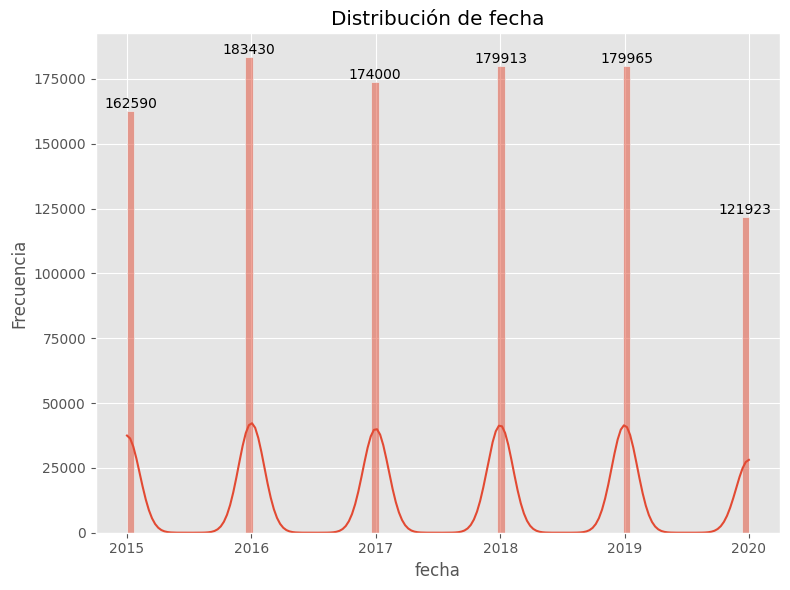

Estadística descriptiva por periodo_dia:
count     1001821
unique          4
top         Tarde
freq       403222
Name: periodo_dia, dtype: object




Estadística descriptiva por gravedad:
count        1001821
unique             3
top       Solo danos
freq          640885
Name: gravedad, dtype: object




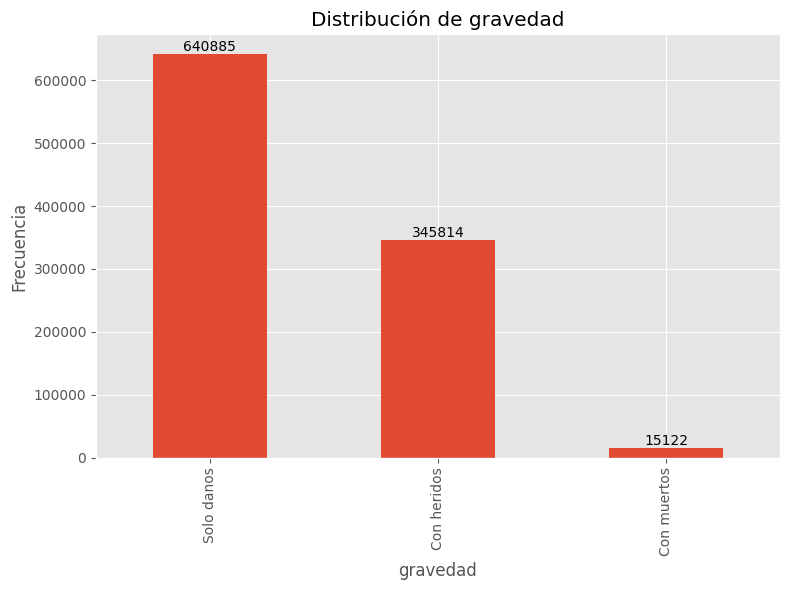

Estadística descriptiva por clase:
count     1001821
unique          7
top        Choque
freq       923669
Name: clase, dtype: object




Estadística descriptiva por choque:
count      1001821
unique           5
top       Vehiculo
freq        981261
Name: choque, dtype: object




Estadística descriptiva por localidad:
count     1001821
unique         20
top       Kennedy
freq       115051
Name: localidad, dtype: object




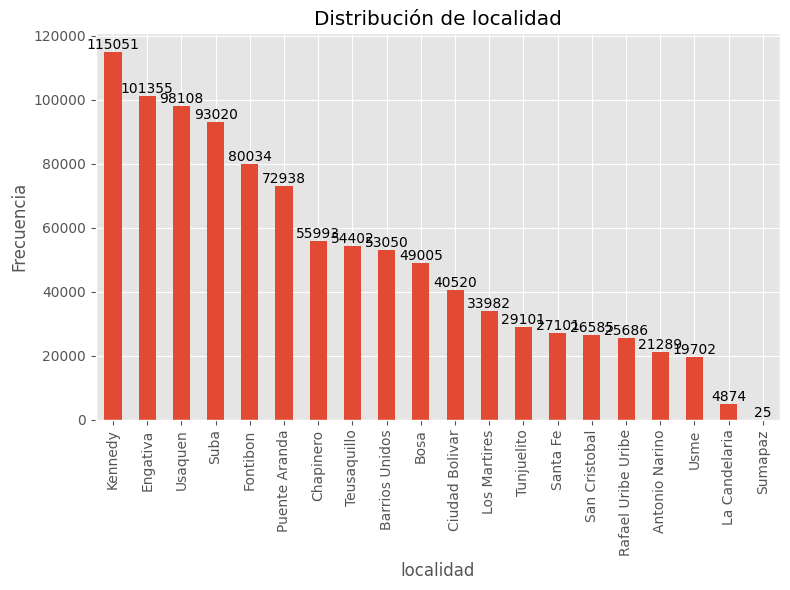

Estadística descriptiva por disenolugar:
count          1001821
unique              13
top       Tramo de via
freq            753475
Name: disenolugar, dtype: object




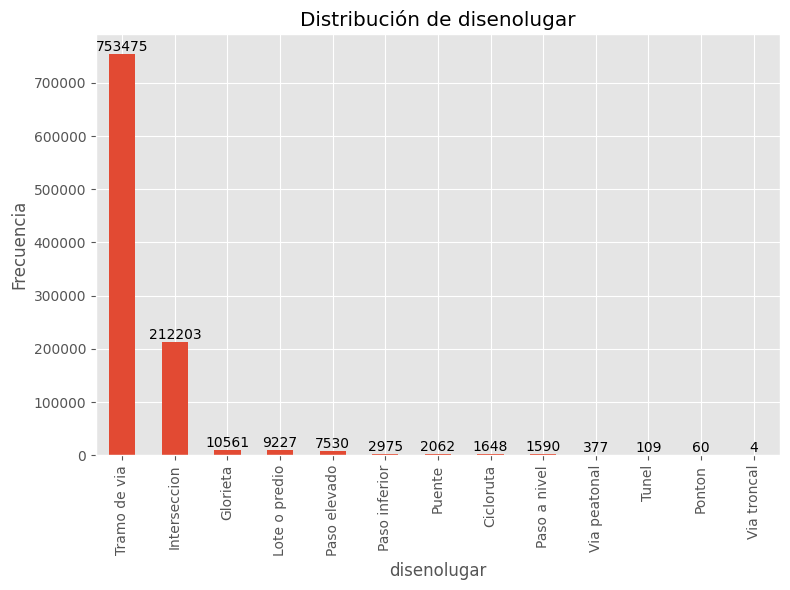

Estadística descriptiva por clasevehiculo:
count       1001821
unique           15
top       Automovil
freq         416122
Name: clasevehiculo, dtype: object




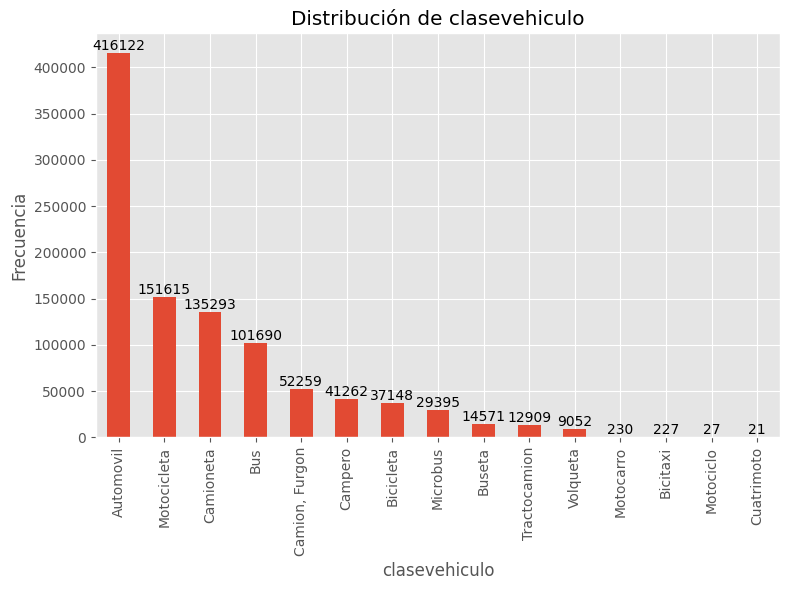

Estadística descriptiva por causa:
count                                               1001821
unique                                                  108
top       No mantener distancia de seguridad (conductor ...
freq                                                 271309
Name: causa, dtype: object




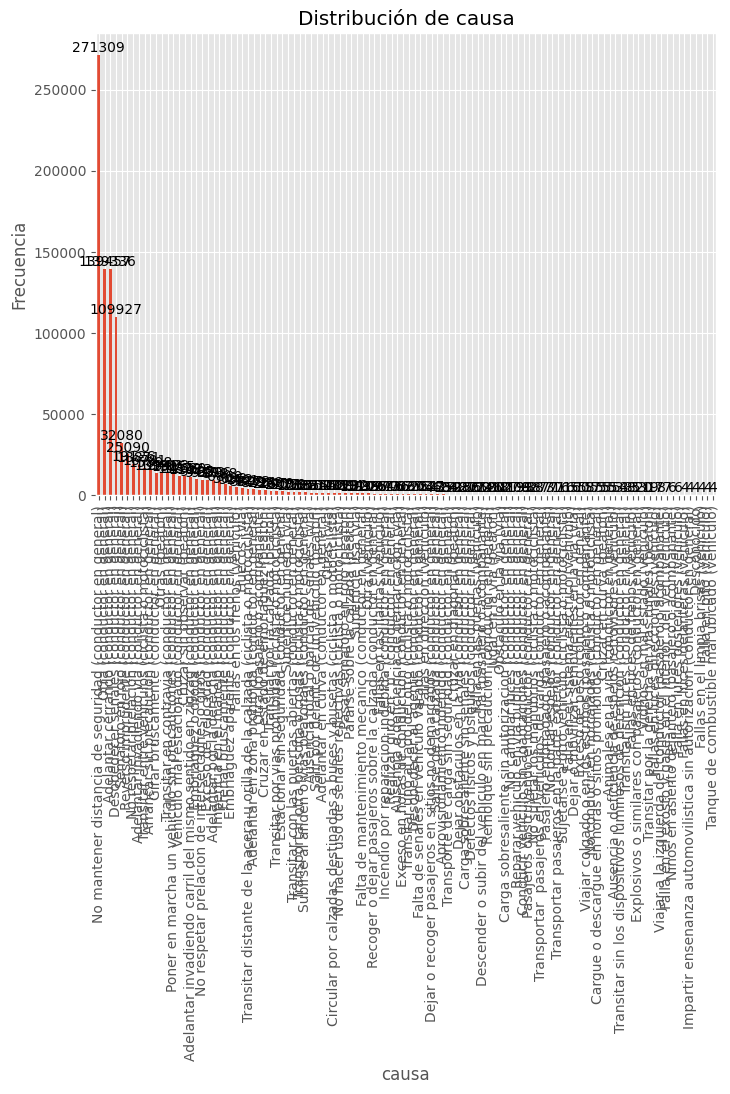

Estadística descriptiva por servicio:
count        1001821
unique             4
top       Particular
freq          591943
Name: servicio, dtype: object




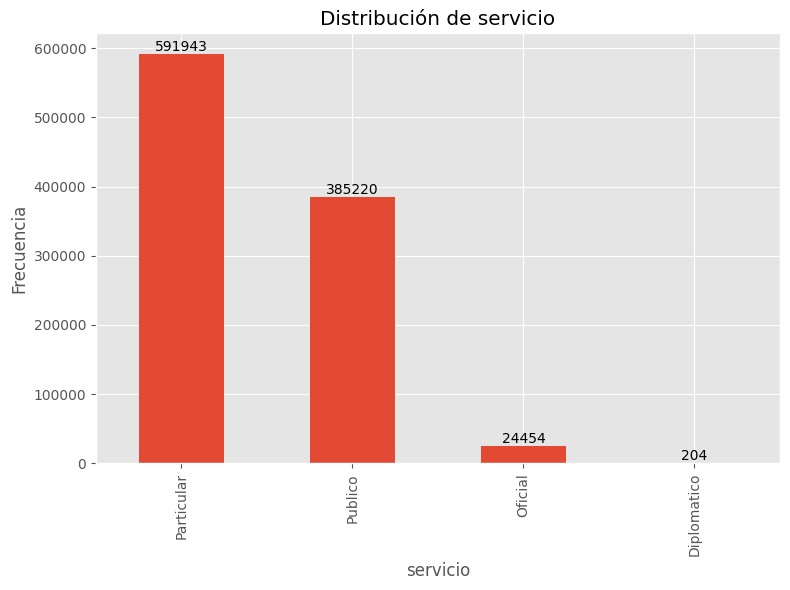

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular y mostrar estadísticas descriptivas por columna
for column in df.columns:
    print(f"Estadística descriptiva por {column}:")
    print(df[column].describe())
    print("\n")

    # Mostrar la distribución de la columna (si es numérica)
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(8, 6))
        ax = sns.histplot(df[column], kde=True)

        # Agregar etiquetas sobre las barras
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}',
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom')

        plt.title(f"Distribución de {column}")
        plt.xlabel(column)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        ax = df[column].value_counts().plot(kind='bar')

        # Agregar etiquetas sobre las barras
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}',
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom')

        plt.title(f"Distribución de {column}")
        plt.xlabel(column)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()



Estadística descriptiva por fecha:
count    1.001821e+06
mean     2.017396e+03
std      1.633612e+00
min      2.015000e+03
25%      2.016000e+03
50%      2.017000e+03
75%      2.019000e+03
max      2.020000e+03
Name: fecha, dtype: float64




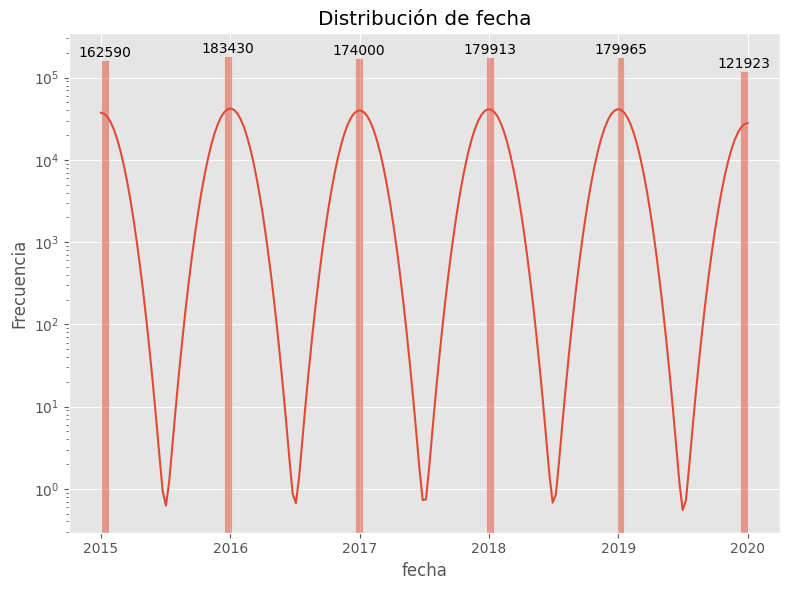

Estadística descriptiva por periodo_dia:
count     1001821
unique          4
top         Tarde
freq       403222
Name: periodo_dia, dtype: object




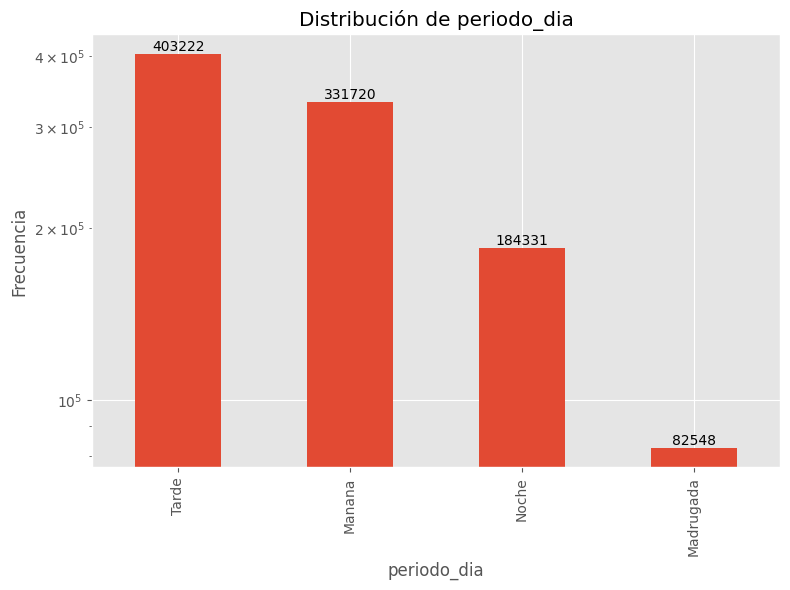

Estadística descriptiva por gravedad:
count        1001821
unique             3
top       Solo danos
freq          640885
Name: gravedad, dtype: object




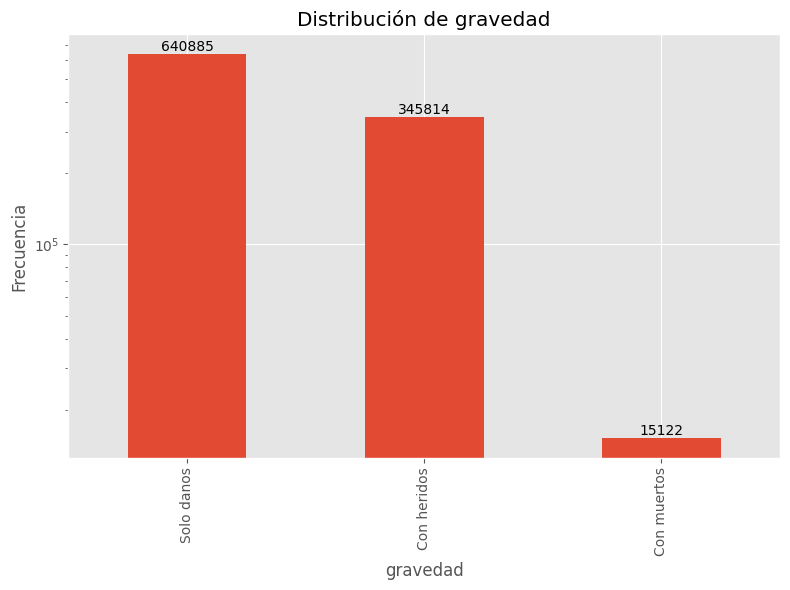

Estadística descriptiva por clase:
count     1001821
unique          7
top        Choque
freq       923669
Name: clase, dtype: object




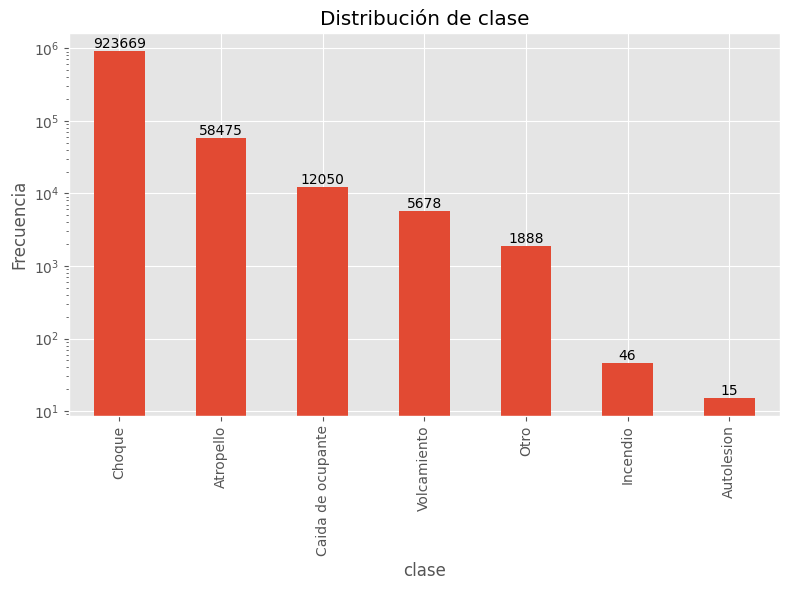

Estadística descriptiva por choque:
count      1001821
unique           5
top       Vehiculo
freq        981261
Name: choque, dtype: object




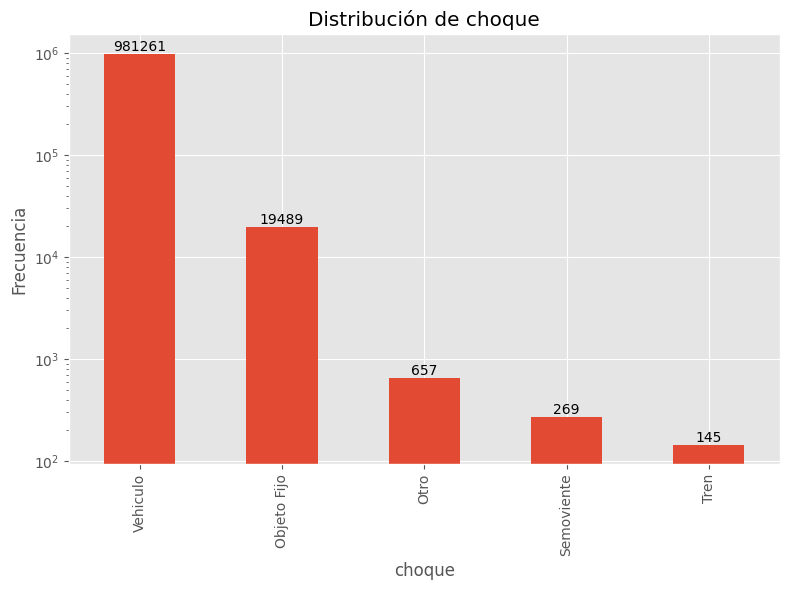

Estadística descriptiva por localidad:
count     1001821
unique         20
top       Kennedy
freq       115051
Name: localidad, dtype: object




Estadística descriptiva por disenolugar:
count          1001821
unique              13
top       Tramo de via
freq            753475
Name: disenolugar, dtype: object




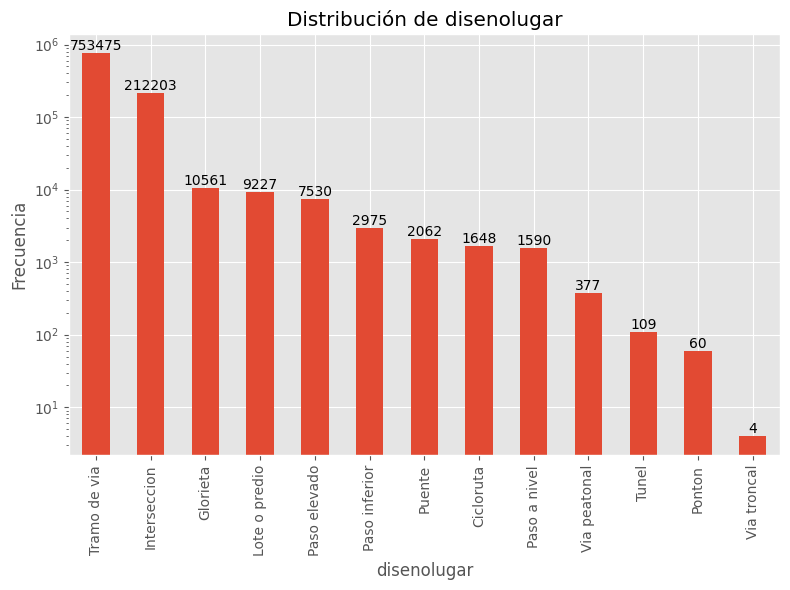

Estadística descriptiva por clasevehiculo:
count       1001821
unique           15
top       Automovil
freq         416122
Name: clasevehiculo, dtype: object




Estadística descriptiva por causa:
count                                               1001821
unique                                                  108
top       No mantener distancia de seguridad (conductor ...
freq                                                 271309
Name: causa, dtype: object




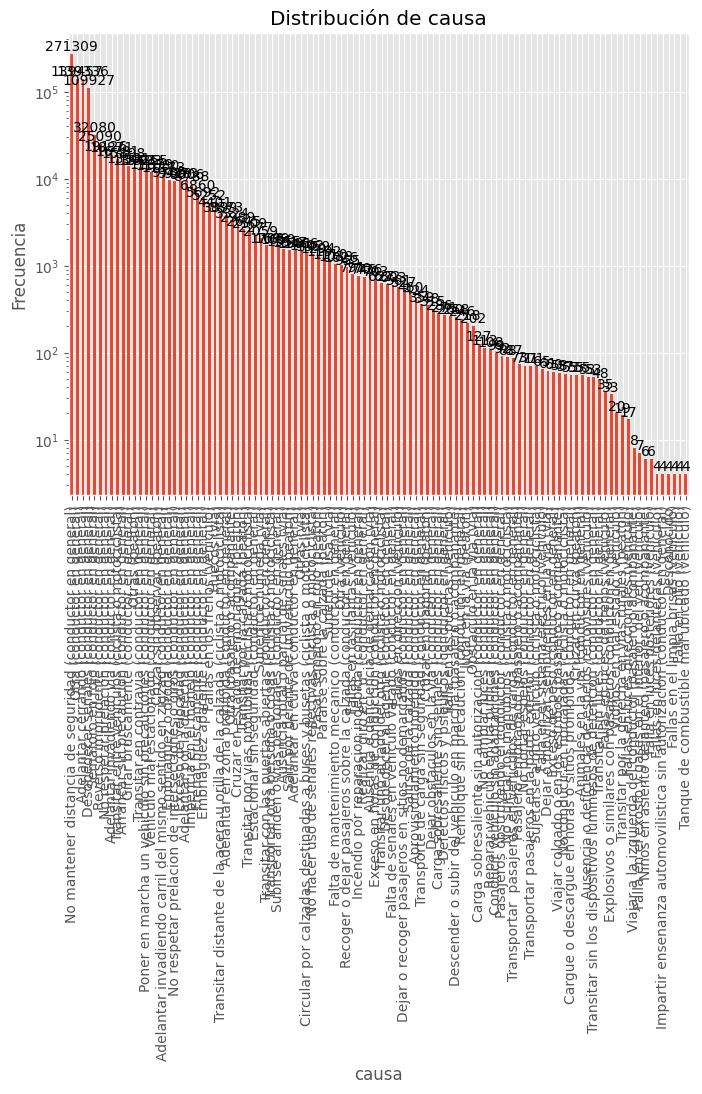

Estadística descriptiva por servicio:
count        1001821
unique             4
top       Particular
freq          591943
Name: servicio, dtype: object




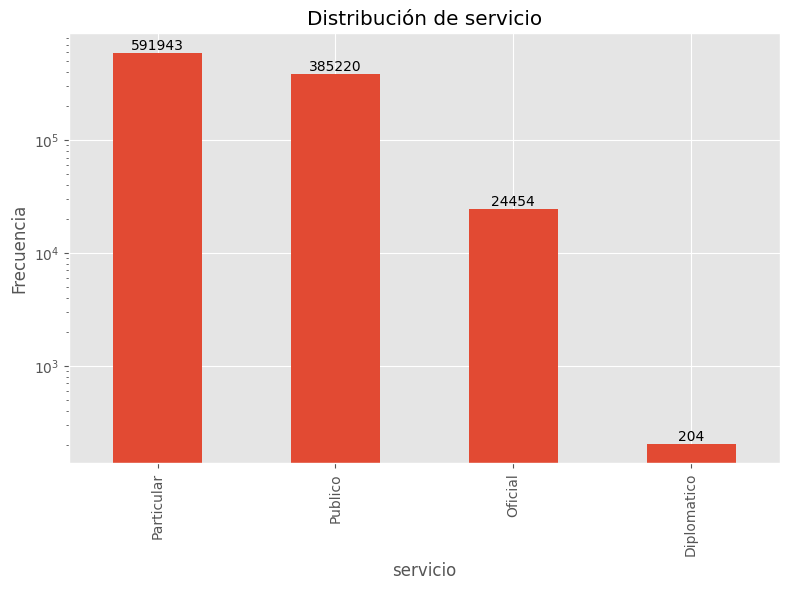

In [12]:
# Calculate and display descriptive statistics for each column
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular y mostrar estadísticas descriptivas por columna
for column in df.columns:
    print(f"Estadística descriptiva por {column}:")
    print(df[column].describe())
    print("\n")

    # Mostrar la distribución de la columna (si es numérica)
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(8, 6))
        plt.yscale('log')  # ¡Esto sí es válido!
        ax = sns.histplot(df[column], kde=True)

        # Agregar etiquetas sobre las barras
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}',
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom')

        plt.title(f"Distribución de {column}")
        plt.xlabel(column)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        plt.yscale('log')  # ¡Esto sí es válido!
        ax = df[column].value_counts().plot(kind='bar')

        # Agregar etiquetas sobre las barras
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}',
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom')

        plt.title(f"Distribución de {column}")
        plt.xlabel(column)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()


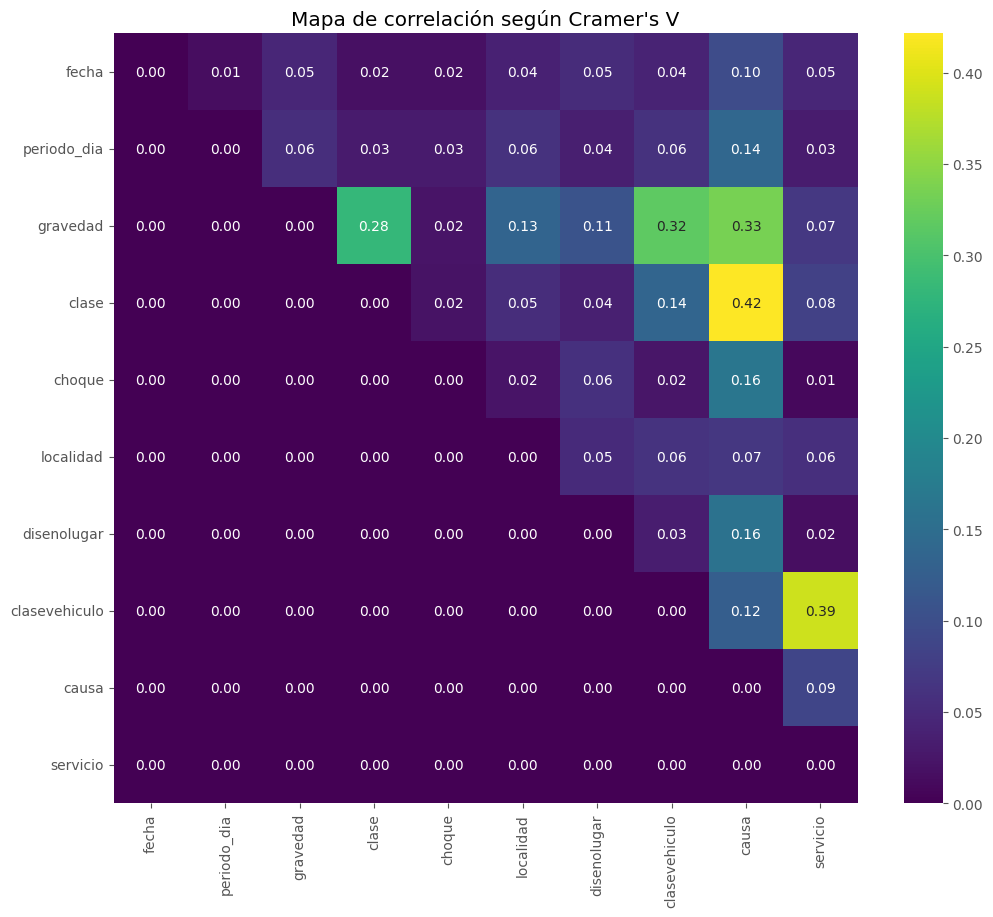

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))

def create_heatmap(df):
    cols = df.columns
    n_cols = len(cols)
    corr_matrix = np.zeros((n_cols, n_cols))
    for i in range(n_cols):
        for j in range(i + 1, n_cols):
          corr_matrix[i, j] = cramers_v(df[cols[i]], df[cols[j]])
    corr_df = pd.DataFrame(corr_matrix, index=cols, columns=cols)
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_df, annot=True, cmap='viridis', fmt=".2f")
    plt.title("Mapa de correlación según Cramer's V")
    plt.show()


create_heatmap(df)

# **Agrupación de categorías**

In [14]:
choque = {
    'Vehiculo': 'Vehiculo',
    'Objeto Fijo': 'Objeto_fijo',
    'Objeto Movil': 'Otro',
    'Semoviente': 'Otro',
    'Tren': 'Otro',
    'Otro': 'Otro'
}
clase = {
    'Choque': 'Colision',
    'Atropello': 'Colision',
    'Caida de ocupante': 'Otro',
    'Volcamiento': 'Otro',
    'Otro': 'Otro',
    'Incendio': 'Otro',
    'Autolesion': 'Otro'
}
clasevehiculo = {
'Automovil': 'Automovil',
'Motocicleta': 'Motocicleta',
'Camioneta': 'Camioneta',
'Bus': 'Bus',
'Camion, Furgon': 'Camion, Furgon',
'Campero': 'Otro',
'Bicicleta': 'Otro',
'Microbus': 'Otro',
'Buseta': 'Otro',
'Tractocamion': 'Otro',
'Volqueta': 'Otro',
'Motocarro': 'Otro',
'Bicitaxi': 'Otro',
'Motociclo': 'Otro',
'Cuatrimoto': 'Otro'
}
disenolugar = {
    'Interseccion': 'Interseccion',
    'Tramo de via': 'Tramo de via',
    'Glorieta': 'Otro',
    'Paso elevado': 'Otro',
    'Paso inferior': 'Otro',
    'Puente': 'Otro',
    'Tunel': 'Otro',
    'Ponton': 'Otro',
    'Cicloruta': 'Otro',
    'Via peatonal': 'Otro',
    'Via troncal': 'Otro',
    'Lote o predio': 'Otro',
    'Paso a nivel': 'Otro'
}
estado ={
    'Ileso': 'Ileso',
    'Herido': 'Con_victimas',
    'Muerto': 'Con_victimas'
}
condicion = {
    'Conductor': 'Conductor',
    'Motociclista': 'Motociclista',
    'Pasajero/Acompanante': 'Otro',
    'Ciclista': 'Otro',
    'Peaton': 'Otro'
}
modalidad = {
    'Pasajeros - Individual': 'Pasajeros',
    'Pasajeros - Masivo': 'Pasajeros',
    'Pasajeros - Colectivo': 'Pasajeros',
    'Pasajeros - Especial turismo': 'Pasajeros_Especial',
    'Pasajeros - Especial escolar': 'Pasajeros_Especial',
    'Pasajeros - Especial Ocasional': 'Pasajeros_Especial',
    'Pasajeros - Especial asalariado': 'Pasajeros_Especial',
    'Carga - Pesada': 'Carga',
    'Carga - Extrapesada': 'Carga',
    'Carga - Extradimensionada': 'Carga',
    'Carga - Mercancia Peligrosa': 'Carga',
    'Mixto': 'Carga'
}
causa = {
    # Causas relacionadas con el CONDUCTOR
    'No respetar prelacion (conductor en general)': 'Conductor',
    'Transportar  pasajeros en vehiculos de carga (conductor en general)': 'Conductor',
    'No mantener distancia de seguridad (conductor en general)': 'Conductor',
    'Desobedecer senales (conductor en general)': 'Conductor',
    'Adelantar cerrando (conductor en general)': 'Conductor',
    'Adelantar invadiendo via (conductor en general)': 'Conductor',
    'No respetar prelacion de intersecciones o giros (conductor en general)': 'Conductor',
    'Impericia en el manejo (conductor en general)': 'Conductor',
    'Reverso imprudente (conductor en general)': 'Conductor',
    'Arrancar sin precaucion (conductor en general)': 'Conductor',
    'Transitar en contravia (conductor en general)': 'Conductor',
    'Girar bruscamente (conductor en general)': 'Conductor',
    'Embriaguez aparente (conductor en general)': 'Conductor',
    'Exceso de velocidad (conductor en general)': 'Conductor',
    'Frenar bruscamente (conductor en general)': 'Conductor',
    'Poner en marcha un vehiculo sin precauciones (conductor en general)': 'Conductor',
    'Semaforo en rojo (conductor en general)': 'Conductor',
    'Subirse al anden o vias peatonales (conductor en general)': 'Conductor',
    'Embriaguez o droga (conductor en general)': 'Conductor',
    'Salirse de la calzada (conductor en general)': 'Conductor',
    'Vehiculo mal estacionado (conductor en general)': 'Conductor',
    'Transitar con las puertas abiertas (conductor en general)': 'Conductor',
    'Aprovisionamiento indebido (conductor en general)': 'Conductor',
    'Adelantar invadiendo carril del mismo sentido en zigzag (conductor en general)': 'Conductor',
    'Adelantar por la derecha (conductor en general)': 'Conductor',
    'Falta de senales en vehiculo varado (conductor en general)': 'Conductor',
    'Falta de mantenimiento mecanico (conductor en general)': 'Conductor',
    'Adelantar en zona prohibida (conductor en general)': 'Conductor',
    'Realizar giro en "u" (conductor en general)': 'Conductor',
    'Estacionar sin seguridad (conductor en general)': 'Conductor',
    'No portar espejos (conductor en general)': 'Conductor',
    'Adelantar en curva (conductor en general)': 'Conductor',
    'Desobedecer al agente (conductor en general)': 'Conductor',
    'Exceso en horas de conduccion (conductor en general)': 'Conductor',
    'Dejar o recoger pasajeros en sitios no demarcados (conductor en general)': 'Conductor',
    'Transporte de carga sin seguridad (conductor en general)': 'Conductor',
    'Recoger o dejar pasajeros sobre la calzada (conductor en general)': 'Conductor',
    'Reparar vehiculo en via publica (conductor en general)': 'Conductor',
    'Cargue o descargue en horas o sitios prohibidos (conductor en general)': 'Conductor',
    'Defectos fisicos y psiquicos (conductor en general)': 'Conductor',
    'Carga sobresaliente sin autorizacion (conductor en general)': 'Conductor',
    'Incendio por reparacion indebida (conductor en general)': 'Conductor',
    'Transportar pasajeros en vehiculos de carga (conductor en general)': 'Conductor',
    'Remolque sin precaucion (conductor en general)': 'Conductor',
    'No cambiar luces (conductor en general)': 'Conductor',
    'Carga sobresaliente sin senales (conductor en general)': 'Conductor',
    'Dejar obstaculos en la via (conductor en general)': 'Conductor',
    'Pasajeros obstruyendo el conductor (conductor en general)': 'Conductor',
    'Animales en la via (conductor en general)': 'Conductor',
    'Transportar pasajeros en la parte exterior (conductor en general)': 'Conductor',
    'Transitar sin luces (conductor en general)': 'Conductor',
    'Conducir vehiculo sin adaptaciones (conductor en general)': 'Conductor',
    'Transitar sin los dispositivos luminosos de detencion (conductor en general)': 'Conductor',
    'Explosivos o similares con pasajeros (conductor en general)': 'Conductor',
    'Exceso de peso (conductor en general)': 'Conductor',
    'Impartir ensenanza automovilistica sin autorizacion (conductor en general)': 'Conductor',

    # Causas relacionadas con PEATONES
    'Otras (peaton)': 'Peaton',
    'Salir por delante de un vehiculo (peaton)': 'Peaton',
    'Cruzar sin observar (peaton)': 'Peaton',
    'Transitar por la calzada (peaton)': 'Peaton',
    'Cruzar en estado de embriaguez (peaton)': 'Peaton',
    'Pasar semaforo en rojo (peaton)': 'Peaton',
    'Cruzar en diagonal (peaton)': 'Peaton',
    'Pararse sobre la calzada (peaton)': 'Peaton',
    'Jugar en la via (peaton)': 'Peaton',
    'Cruzar en curva (peaton)': 'Peaton',
    'Transitar por la derecha en vias rurales (peaton)': 'Peaton',

    # Causas relacionadas con CICLISTAS/MOTOCICLISTAS
    'Transitar entre vehiculos (ciclista o motociclista)': 'Ciclista_Motociclista',
    'Transitar distante de la acera u orilla de la calzada (ciclista o motociclista)': 'Ciclista_Motociclista',
    'Circular por calzadas destinadas a buses y busetas (ciclista o motociclista)': 'Ciclista_Motociclista',
    'Transportar otra persona o cosas (ciclista o motociclista)': 'Ciclista_Motociclista',
    'Transitar por vias prohibidas (ciclista o motociclista)': 'Ciclista_Motociclista',
    'No hacer uso de senales reflectivas (ciclista o motociclista)': 'Ciclista_Motociclista',
    'Transitar uno al lado del otro (ciclista o motociclista)': 'Ciclista_Motociclista',
    'No sujetar los manubrios (ciclista o motociclista)': 'Ciclista_Motociclista',
    'No conducir en horcajadas (ciclista o motociclista)': 'Ciclista_Motociclista',
    'Sujetarse a otro vehiculo (ciclista o motociclista)': 'Ciclista_Motociclista',

    # Causas relacionadas con ACOMPAÑANTES/PASAJEROS
    'Descender o subir del vehiculo en marcha (pasajero o acompanante)': 'Acompanante',
    'Otra (pasajero o acompanante)': 'Acompanante',
    'Ninos en asiento delantero (pasajero o acompanante)': 'Acompanante',
    'Viajar colgado o en los estribos (pasajero o acompanante)': 'Acompanante',
    'Pasajero embriagado (pasajero o acompanante)': 'Acompanante',
    'Viajar a la izquierda del conductor (pasajero o acompanante)': 'Acompanante',

    # Causas relacionadas con el VEHÍCULO
    'Fallas en los frenos (vehiculo)': 'Vehiculo',
    'Falla en el exosto y gases en el interior  del veh (vehiculo)': 'Vehiculo',
    'Otra (vehiculo)': 'Vehiculo',
    'Fallas en direccion (vehiculo)': 'Vehiculo',
    'Falla en las puertas (vehiculo)': 'Vehiculo',
    'Fallas en las llantas (vehiculo)': 'Vehiculo',
    'Ausencia o deficiencia de espejos retrovisores (vehiculo)': 'Vehiculo',
    'Vidrios en mal estado (vehiculo)': 'Vehiculo',
    'Falla en el sistema electrico (vehiculo)': 'Vehiculo',
    'Falla en luces posteriores (vehiculo)': 'Vehiculo',
    'Fallas en luces delanteras (vehiculo)': 'Vehiculo',
    'Fallas en luces de frenos (vehiculo)': 'Vehiculo',
    'Fallas en el limpia brisas (vehiculo)': 'Vehiculo',
    'Fallas en luces direccionales (vehiculo)': 'Vehiculo',
    'Falla en el exosto y gases en el interior del veh (vehiculo)': 'Vehiculo',
    'Falla en pito (vehiculo)': 'Vehiculo',
    'Tanque de combustible mal ubicado (vehiculo)': 'Vehiculo',

    # Causas relacionadas con la VÍA
    'Ausencia total o parcial de senales (via)': 'Via',
    'Huecos (via)': 'Via',
    'Otras (via)': 'Via',
    'Superficie humeda (via)': 'Via',
    'Ausencia o deficiencia de demarcacion (via)': 'Via',
    'Superficie lisa (via)': 'Via',
    'Obstaculo en la via (via)': 'Via',
    'Dejar o movilizar semovientes en la via (via)': 'Via',

    # Otras categorias
    'Otra (conductor en general)': 'Otros',
    'Desconocido': 'Otros'
}

In [15]:
import pandas as pd

# Diccionario de mapeos (según lo proporcionado)
mapeos_completos = {
    'estado': estado,
    'clase': clase,
    'choque': choque,
    'condicion': condicion,
    'modalidad': modalidad,
    'disenolugar': disenolugar,
    'causa': causa,
    'clasevehiculo': clasevehiculo
}

def agrupar_categorias(df, mapeos):

    df_agrupado = df.copy()
    reporte = []

    for columna, mapeo in mapeos.items():
        if columna in df.columns:
            # Nombre de la nueva columna
            nueva_col = columna

            # Verificar valores únicos antes de mapear
            valores_originales = df[columna].unique()
            valores_no_mapeados = [v for v in valores_originales if v not in mapeo]

            # Aplicar mapeo y manejar valores no encontrados
            df_agrupado[nueva_col] = df[columna].map(mapeo).fillna('NO_MAPEADO')

            # Registrar estadísticas
            reporte.append({
                'Columna': columna,
                'Valores_originales': len(valores_originales),
                'Valores_no_mapeados': len(valores_no_mapeados),
                'Ejemplos_no_mapeados': valores_no_mapeados[:3] if valores_no_mapeados else None,
                'Nueva_columna': nueva_col,
                'Valores_agrupados': len(df_agrupado[nueva_col].unique())
            })

    return df_agrupado, pd.DataFrame(reporte)

# Aplicar la función
df_agrupado, reporte_transformacion = agrupar_categorias(df, mapeos_completos)

# Mostrar reporte
print("Reporte de Transformación:")
print(reporte_transformacion)

# Verificación adicional
print("\nColumnas resultantes en df_agrupado:")
print(df_agrupado.columns.tolist())

Reporte de Transformación:
         Columna  Valores_originales  Valores_no_mapeados  \
0          clase                   7                    0   
1         choque                   5                    0   
2    disenolugar                  13                    0   
3          causa                 108                    0   
4  clasevehiculo                  15                    0   

  Ejemplos_no_mapeados  Nueva_columna  Valores_agrupados  
0                 None          clase                  2  
1                 None         choque                  3  
2                 None    disenolugar                  3  
3                 None          causa                  7  
4                 None  clasevehiculo                  6  

Columnas resultantes en df_agrupado:
['fecha', 'periodo_dia', 'gravedad', 'clase', 'choque', 'localidad', 'disenolugar', 'clasevehiculo', 'causa', 'servicio']


In [16]:
for col in df_agrupado.columns:
    print(f"Column '{col}': {df_agrupado[col].nunique()} categories")

Column 'fecha': 6 categories
Column 'periodo_dia': 4 categories
Column 'gravedad': 3 categories
Column 'clase': 2 categories
Column 'choque': 3 categories
Column 'localidad': 20 categories
Column 'disenolugar': 3 categories
Column 'clasevehiculo': 6 categories
Column 'causa': 7 categories
Column 'servicio': 4 categories


In [17]:
df_agrupado.head()

fecha periodo_dia    gravedad     clase    choque localidad   disenolugar  \
0   2015      Manana  Solo danos  Colision  Vehiculo      Suba  Tramo de via   
1   2015      Manana  Solo danos  Colision  Vehiculo      Suba  Tramo de via   
2   2015      Manana  Solo danos  Colision  Vehiculo      Suba  Tramo de via   
3   2015      Manana  Solo danos  Colision  Vehiculo      Suba  Tramo de via   
4   2015      Manana  Solo danos  Colision  Vehiculo  Engativa  Tramo de via   

  clasevehiculo      causa    servicio  
0           Bus  Conductor     Publico  
1     Automovil  Conductor  Particular  
2           Bus  Conductor     Publico  
3     Automovil  Conductor  Particular  
4     Automovil  Conductor     Publico

Estilos disponibles en matplotlib: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

Análisis de la columna: fecha

Estadísticas descriptivas:
count    1.001821e+06
mean     2.017396e+03
std      1.633612e+00
min      2.015000e+03
25%      2.016000e+03
50%      2.017000e+03
75%      2.019000e+03
max      2.020000e+03
Name: fecha, dtype: float64


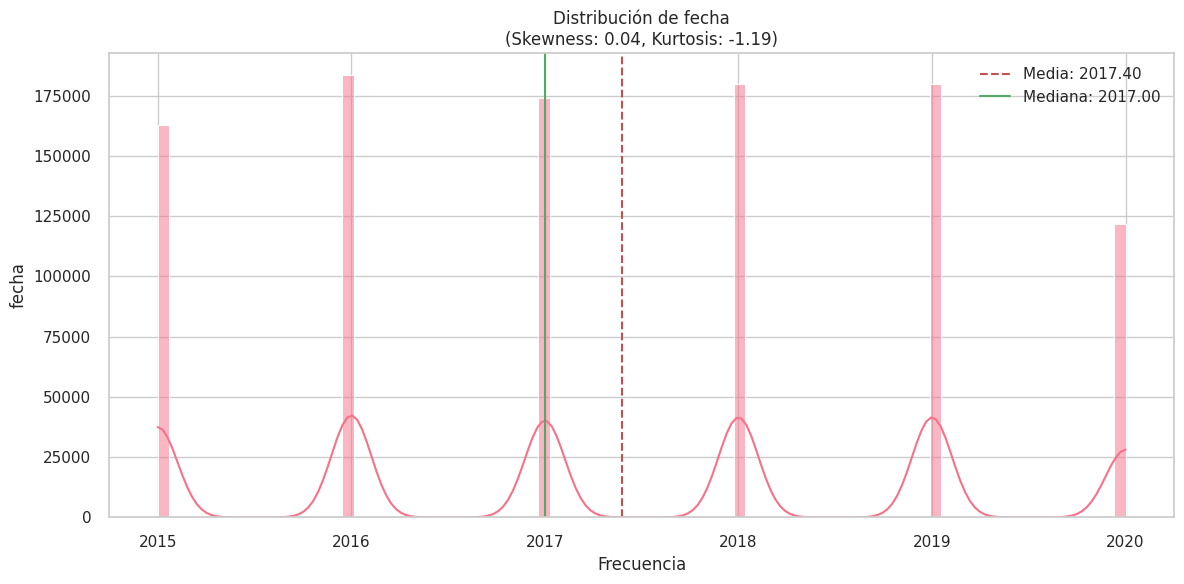


Análisis de la columna: periodo_dia

Estadísticas descriptivas:
count     1001821
unique          4
top         Tarde
freq       403222
Name: periodo_dia, dtype: object

Valores únicos (4):
periodo_dia
Tarde        403222
Manana       331720
Noche        184331
Madrugada     82548
Name: count, dtype: int64


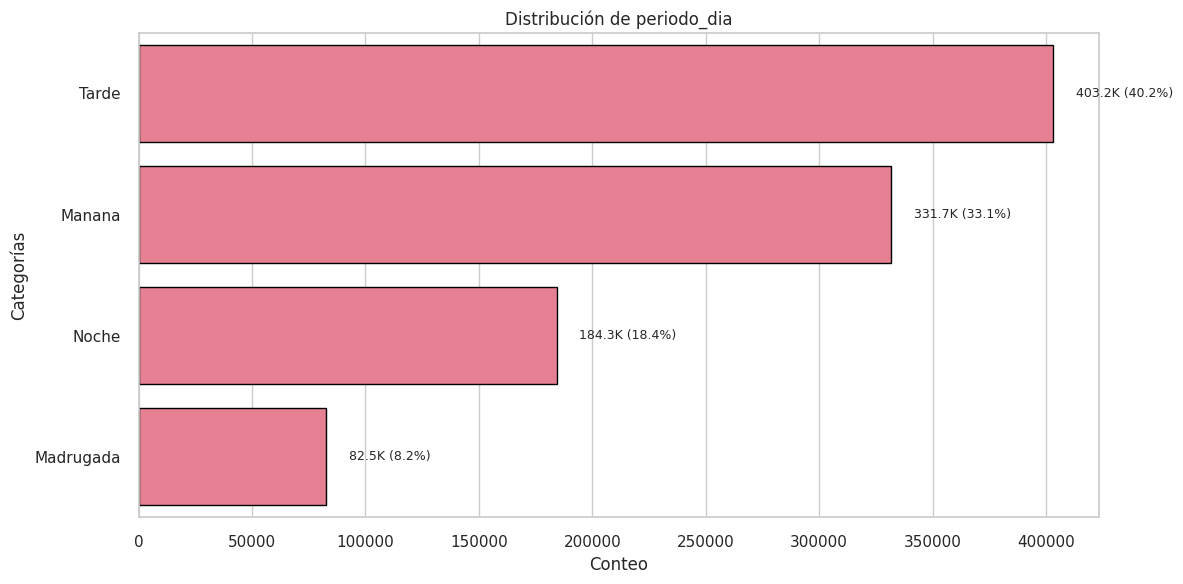


Análisis de la columna: gravedad

Estadísticas descriptivas:
count        1001821
unique             3
top       Solo danos
freq          640885
Name: gravedad, dtype: object

Valores únicos (3):
gravedad
Solo danos     640885
Con heridos    345814
Con muertos     15122
Name: count, dtype: int64


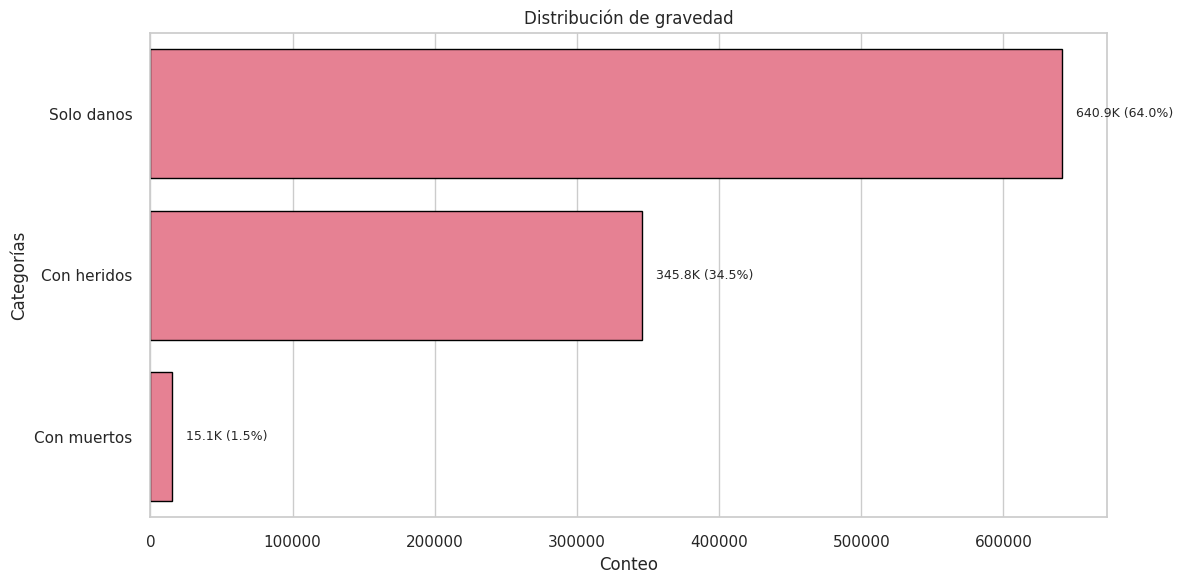


Análisis de la columna: clase

Estadísticas descriptivas:
count      1001821
unique           2
top       Colision
freq        982144
Name: clase, dtype: object

Valores únicos (2):
clase
Colision    982144
Otro         19677
Name: count, dtype: int64


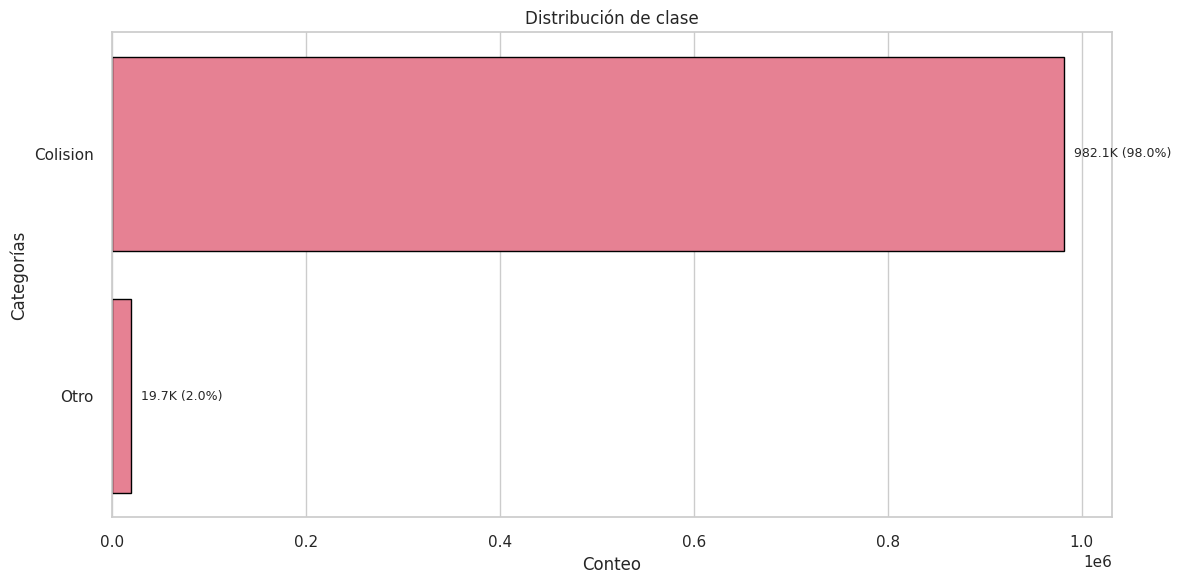


Análisis de la columna: choque

Estadísticas descriptivas:
count      1001821
unique           3
top       Vehiculo
freq        981261
Name: choque, dtype: object

Valores únicos (3):
choque
Vehiculo       981261
Objeto_fijo     19489
Otro             1071
Name: count, dtype: int64


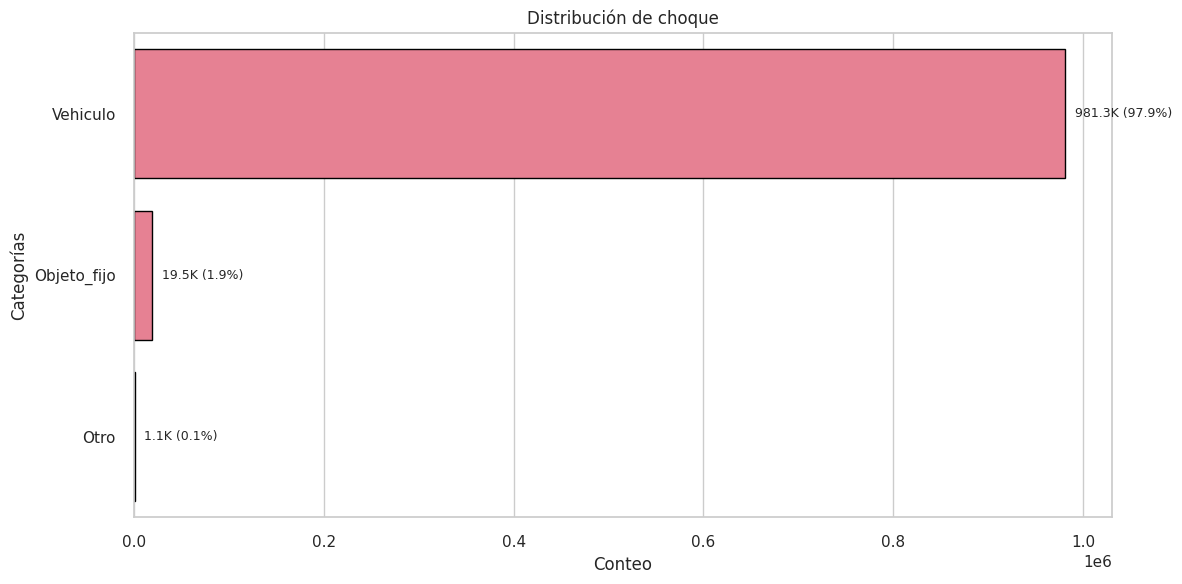


Análisis de la columna: localidad

Estadísticas descriptivas:
count     1001821
unique         20
top       Kennedy
freq       115051
Name: localidad, dtype: object

Valores únicos (20):
localidad
Kennedy               115051
Engativa              101355
Usaquen                98108
Suba                   93020
Fontibon               80034
Puente Aranda          72938
Chapinero              55993
Teusaquillo            54402
Barrios Unidos         53050
Bosa                   49005
Ciudad Bolivar         40520
Los Martires           33982
Tunjuelito             29101
Santa Fe               27101
San Cristobal          26585
Rafael Uribe Uribe     25686
Antonio Narino         21289
Usme                   19702
La Candelaria           4874
Sumapaz                   25
Name: count, dtype: int64



Análisis de la columna: disenolugar

Estadísticas descriptivas:
count          1001821
unique               3
top       Tramo de via
freq            753475
Name: disenolugar, dtype: object

Valores únicos (3):
disenolugar
Tramo de via    753475
Interseccion    212203
Otro             36143
Name: count, dtype: int64


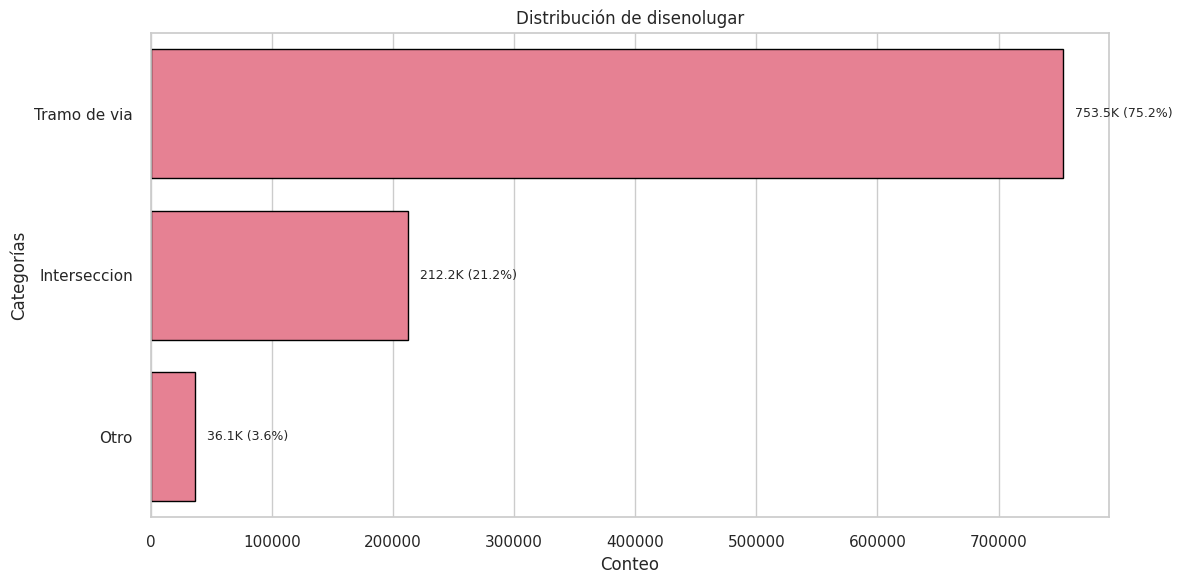


Análisis de la columna: clasevehiculo

Estadísticas descriptivas:
count       1001821
unique            6
top       Automovil
freq         416122
Name: clasevehiculo, dtype: object

Valores únicos (6):
clasevehiculo
Automovil         416122
Motocicleta       151615
Otro              144842
Camioneta         135293
Bus               101690
Camion, Furgon     52259
Name: count, dtype: int64



Análisis de la columna: causa

Estadísticas descriptivas:
count       1001821
unique            7
top       Conductor
freq         775002
Name: causa, dtype: object

Valores únicos (7):
causa
Conductor                775002
Otros                    139461
Peaton                    35450
Ciclista_Motociclista     28482
Via                       11590
Vehiculo                   8109
Acompanante                3727
Name: count, dtype: int64



Análisis de la columna: servicio

Estadísticas descriptivas:
count        1001821
unique             4
top       Particular
freq          591943
Name: servicio, dtype: object

Valores únicos (4):
servicio
Particular     591943
Publico        385220
Oficial         24454
Diplomatico       204
Name: count, dtype: int64


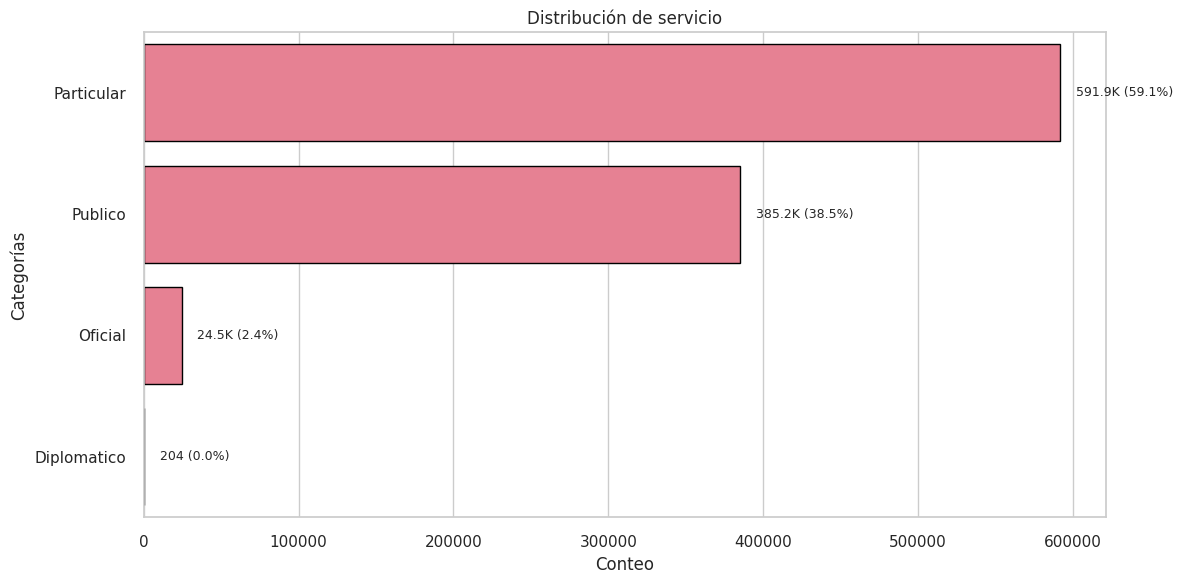

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuración de estilo corregida
plt.style.use('seaborn-v0_8')  # Usamos el estilo actualizado de seaborn
sns.set_theme(style="whitegrid")  # Configuración moderna de seaborn
sns.set_palette("husl")

# Ver los estilos disponibles
print("Estilos disponibles en matplotlib:", plt.style.available)

# Función para formatear números grandes
def format_large_number(num):
    if num >= 1e6:
        return f"{num/1e6:.1f}M"
    elif num >= 1e3:
        return f"{num/1e3:.1f}K"
    return str(int(num))

# Calcular y mostrar estadísticas descriptivas y distribuciones por columna
for column in df_agrupado.columns:
    print(f"\n{'='*50}")
    print(f"Análisis de la columna: {column}")
    print(f"{'='*50}")

    # Estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df_agrupado[column].describe())

    # Valores únicos para categóricas
    if not pd.api.types.is_numeric_dtype(df_agrupado[column]):
        print(f"\nValores únicos ({len(df_agrupado[column].unique())}):")
        print(df_agrupado[column].value_counts(dropna=False).head(20))

    # Visualización de la distribución
    plt.figure(figsize=(12, 6))

    if pd.api.types.is_numeric_dtype(df_agrupado[column]):
        # Histograma para variables numéricas
        ax = sns.histplot(df_agrupado[column], kde=True, bins='auto', edgecolor='white')

        # Añadir líneas de estadísticas descriptivas
        mean_val = df_agrupado[column].mean()
        median_val = df_agrupado[column].median()
        plt.axvline(mean_val, color='r', linestyle='--', label=f'Media: {mean_val:.2f}')
        plt.axvline(median_val, color='g', linestyle='-', label=f'Mediana: {median_val:.2f}')

        plt.title(f"Distribución de {column}\n(Skewness: {df_agrupado[column].skew():.2f}, Kurtosis: {df_agrupado[column].kurtosis():.2f})")
        plt.legend()
    else:
        # Gráfico de barras para variables categóricas
        value_counts = df_agrupado[column].value_counts(dropna=False)

        # Si hay muchas categorías, mostrar solo las principales
        if len(value_counts) > 15:
            top_values = value_counts.head(15)
            other_count = value_counts[15:].sum()
            top_values['Otros'] = other_count
            plot_data = top_values
            title_note = "\n(Mostrando top 15 categorías)"
        else:
            plot_data = value_counts
            title_note = ""

        ax = sns.barplot(x=plot_data.values, y=plot_data.index, orient='h', edgecolor='black')

        # Añadir porcentajes
        total = len(df_agrupado[column])
        for i, (value, count) in enumerate(zip(plot_data.index, plot_data.values)):
            percentage = 100 * count / total
            ax.text(count + total*0.01, i,
                   f"{format_large_number(count)} ({percentage:.1f}%)",
                   va='center', fontsize=9)

        plt.title(f"Distribución de {column}{title_note}")

    plt.xlabel("Frecuencia" if pd.api.types.is_numeric_dtype(df_agrupado[column]) else "Conteo")
    plt.ylabel(column if pd.api.types.is_numeric_dtype(df_agrupado[column]) else "Categorías")
    plt.tight_layout()
    plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))

def create_heatmap(df):
    cols = df.columns
    n_cols = len(cols)
    corr_matrix = np.zeros((n_cols, n_cols))
    for i in range(n_cols):
        for j in range(i + 1, n_cols):
          corr_matrix[i, j] = cramers_v(df[cols[i]], df[cols[j]])
    corr_df = pd.DataFrame(corr_matrix, index=cols, columns=cols)
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_df, annot=True, cmap='viridis', fmt=".2f")
    plt.title("Mapa de correlación según Cramer's V")
    plt.show()


create_heatmap(df_agrupado)

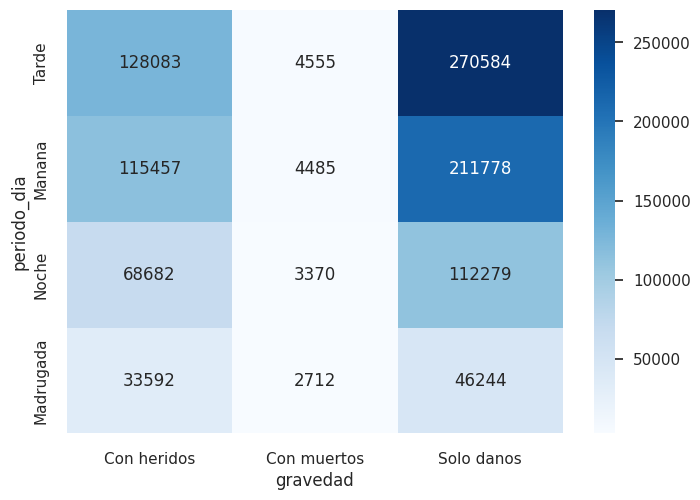

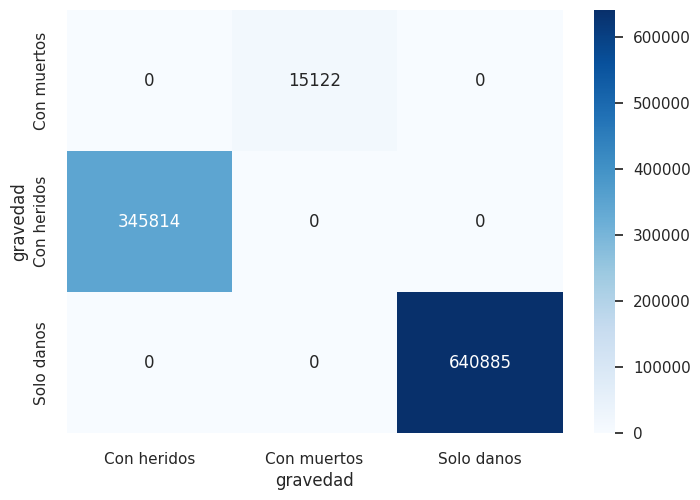

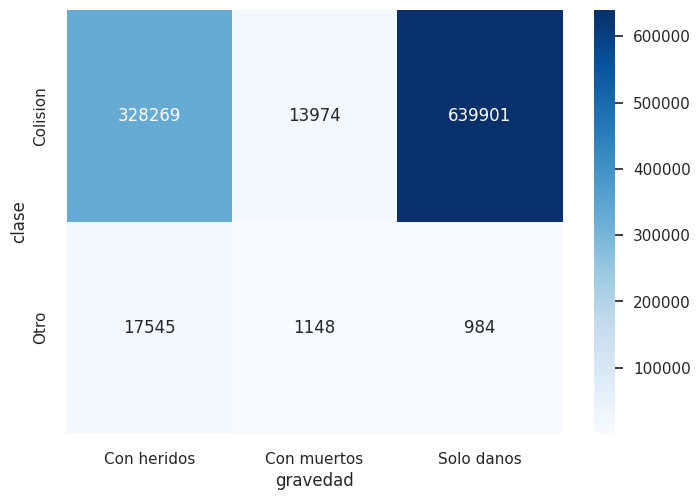

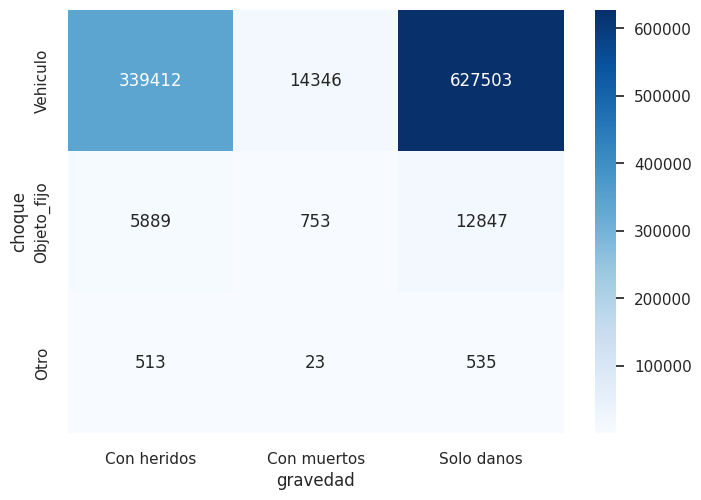

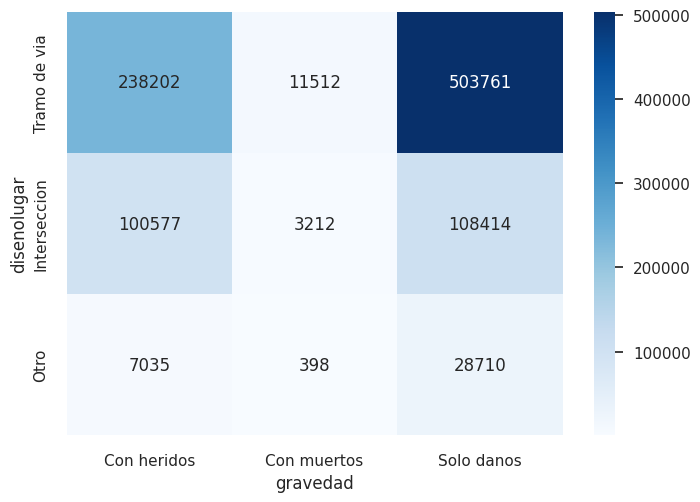

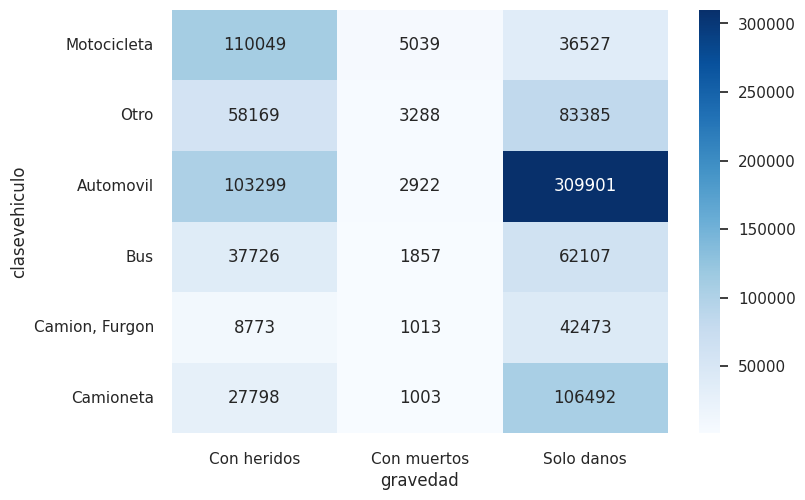

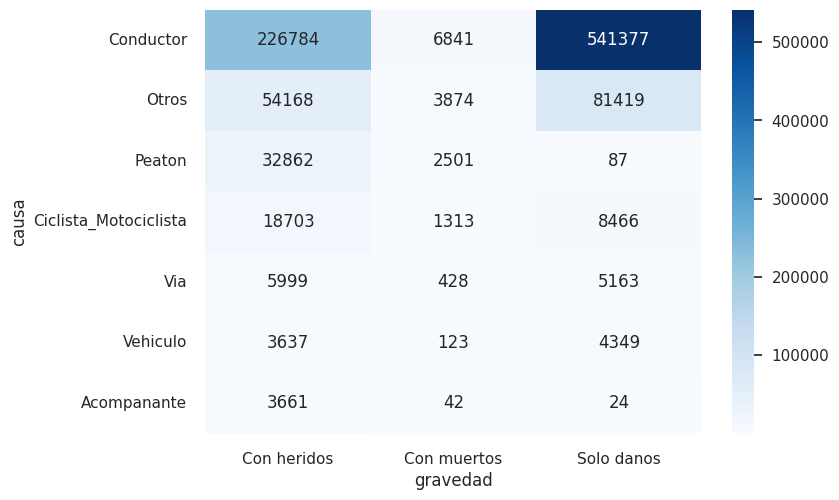

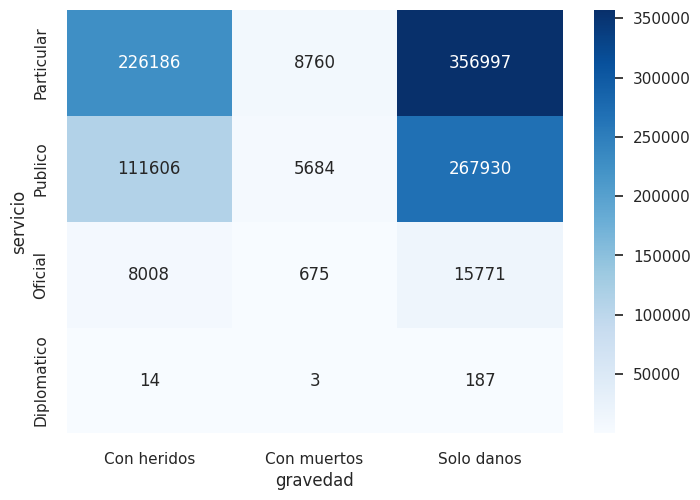

In [20]:
import pandas as pd
import prince
import matplotlib.pyplot as plt
import seaborn as sns

# Tabla de contingencias.
for i in df_agrupado.columns:
    if i != "Gravedad_agrupada":
        df_crosstab_ht = pd.crosstab(df_agrupado[i], df_agrupado["gravedad"])
        # Heatmap tabla de contingencias
        sns.heatmap(
            df_crosstab_ht.sort_values(by=["Con muertos"], ascending=False),
            annot=True,
            cmap="Blues",
            fmt=".0f",
        )
        plt.show()

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.004        95.49%                     95.49%
1              0.000         4.51%                    100.00%


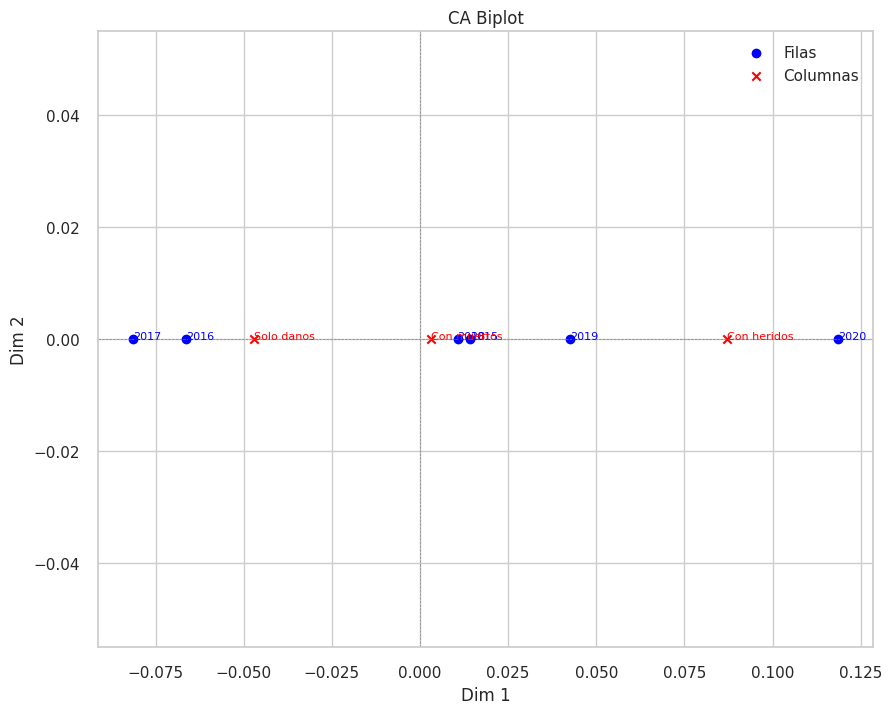

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.006        96.26%                     96.26%
1              0.000         3.74%                    100.00%


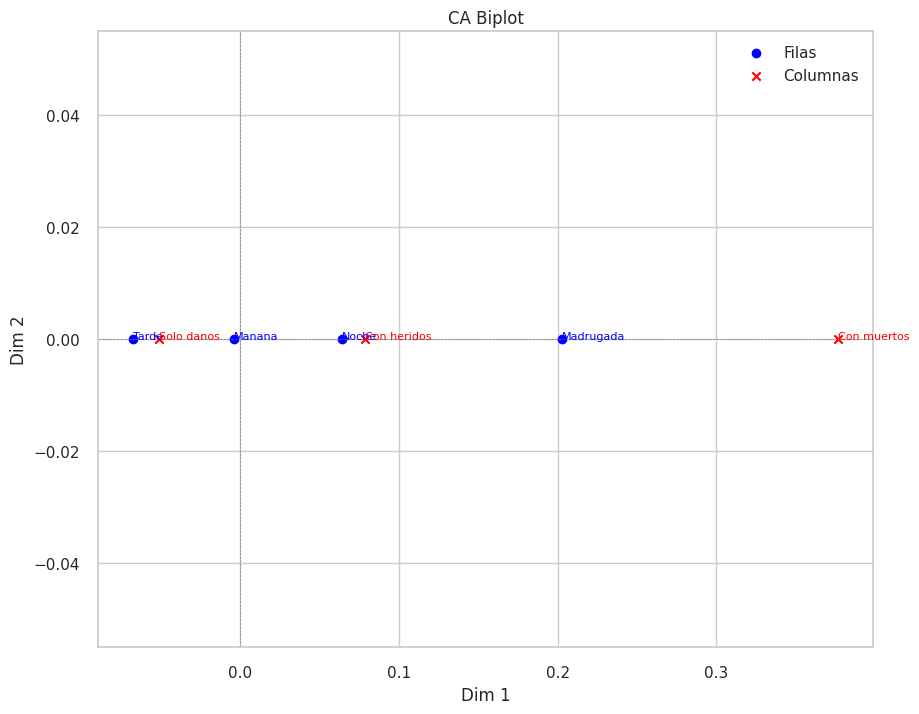

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.031       100.00%                    100.00%


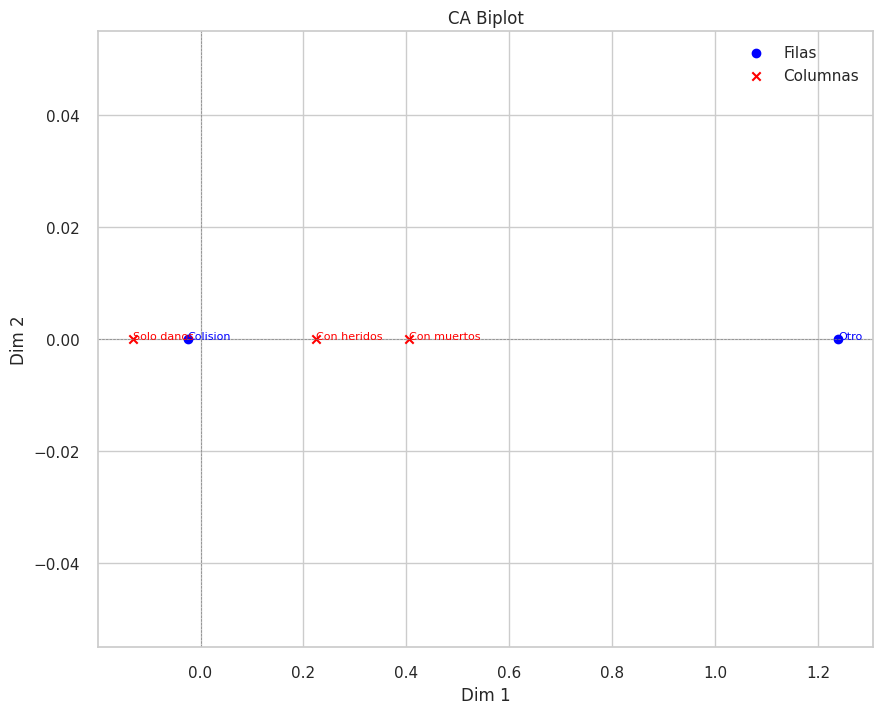

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.001        90.62%                     90.62%
1              0.000         9.38%                    100.00%


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.035        97.15%                     97.15%
1              0.001         2.85%                    100.00%


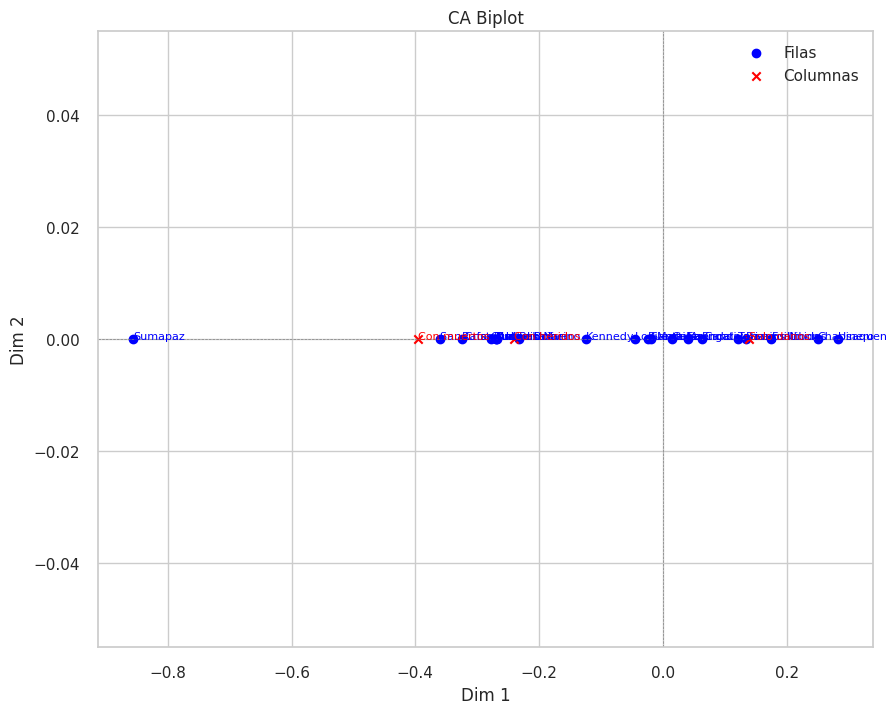

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.022        99.83%                     99.83%
1              0.000         0.17%                    100.00%


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.147        99.27%                     99.27%
1              0.001         0.73%                    100.00%


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.102        98.49%                     98.49%
1              0.002         1.51%                    100.00%


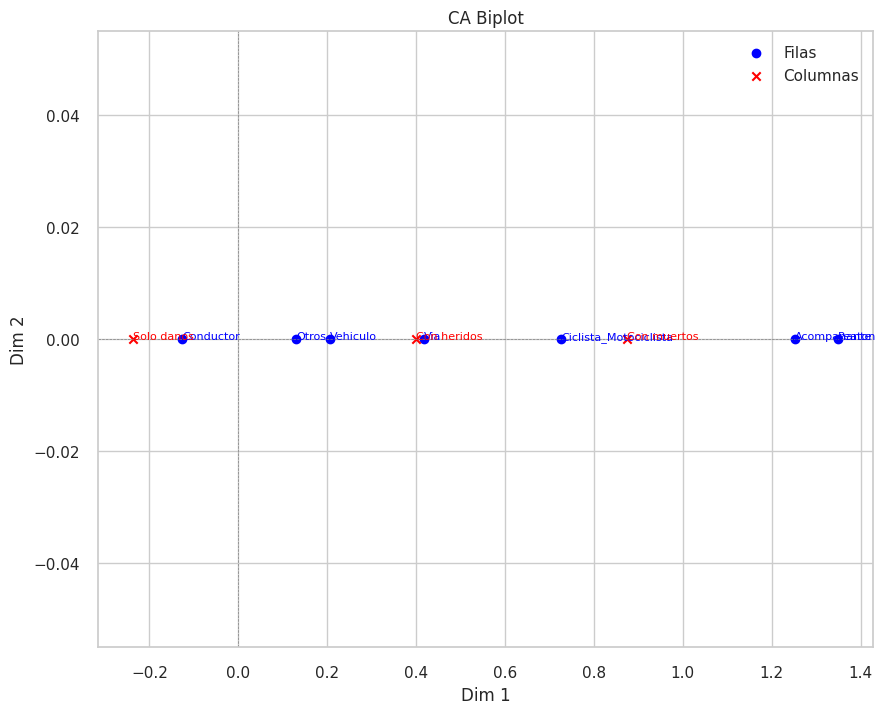

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.009        97.15%                     97.15%
1              0.000         2.85%                    100.00%


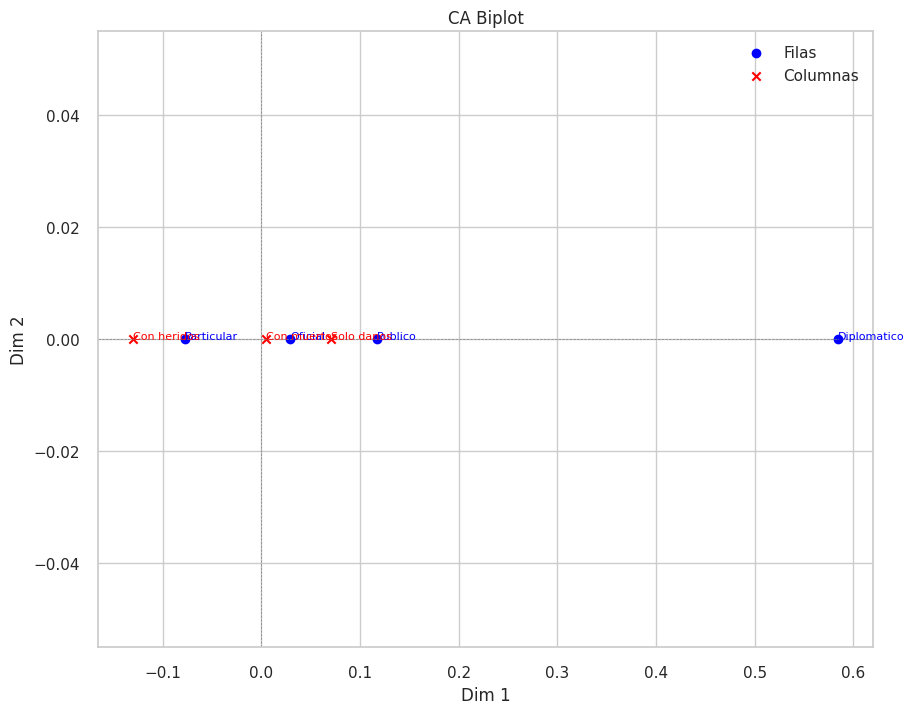

In [21]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Tabla de contingencias.
for i in df_agrupado.columns:
    if i != "gravedad":
        df_crosstab_ht = pd.crosstab(df_agrupado[i], df_agrupado["gravedad"])

        # Creamos y ajustamos un objeto CA de prince.
        ca = prince.CA(n_components=3)
        ca.fit(df_crosstab_ht)

        print(ca.eigenvalues_summary)

        eigvals = ca.eigenvalues_

        # 2. Obtener coordenadas de las filas y columnas
        row_coords = ca.row_coordinates(df_crosstab_ht)
        col_coords = ca.column_coordinates(df_crosstab_ht)

        # 3. Crear el biplot
        plt.figure(figsize=(10, 8))

        # Filas (Usar la columna 0, ya que solo hay una)
        plt.scatter(row_coords[0], [0] * len(row_coords), color='blue', label='Filas') # Ajustar la segunda coordenada a 0
        for i, label in enumerate(df_crosstab_ht.index):
            plt.text(row_coords.iloc[i, 0], 0, str(label), color='blue', fontsize=8)  # Ajustar la segunda coordenada a 0

        # Columnas (Usar la columna 0, ya que solo hay una)
        plt.scatter(col_coords[0], [0] * len(col_coords), color='red', marker='x', label='Columnas') # Ajustar la segunda coordenada a 0
        for i, label in enumerate(df_crosstab_ht.columns):
            plt.text(col_coords.iloc[i, 0], 0, str(label), color='red', fontsize=8) # Ajustar la segunda coordenada a 0


        plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
        plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
        plt.title('CA Biplot')
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')
        plt.legend()
        plt.grid(True)
        plt.show()

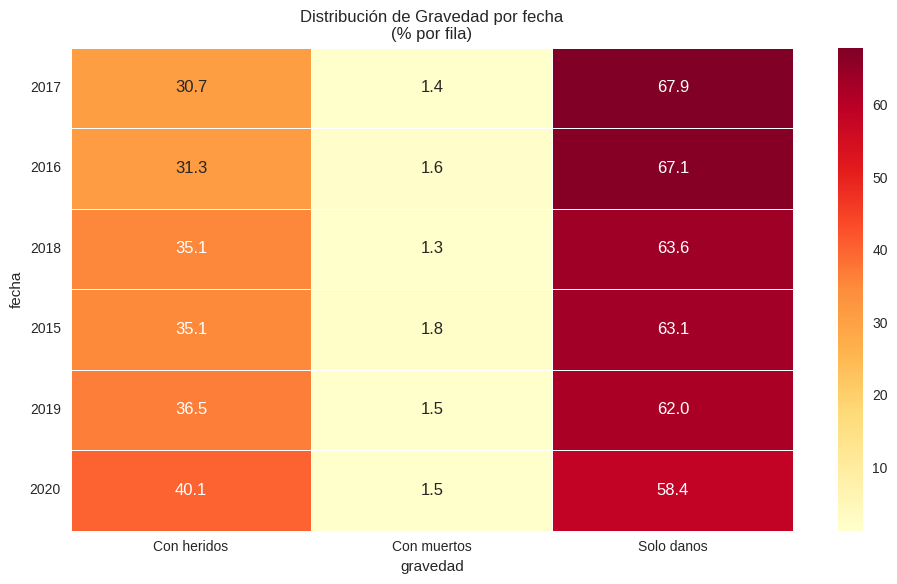

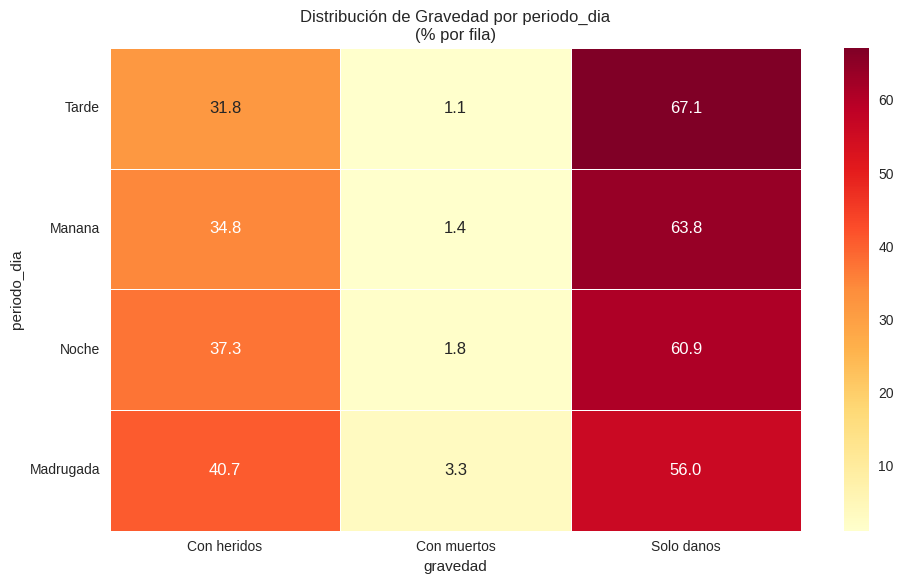

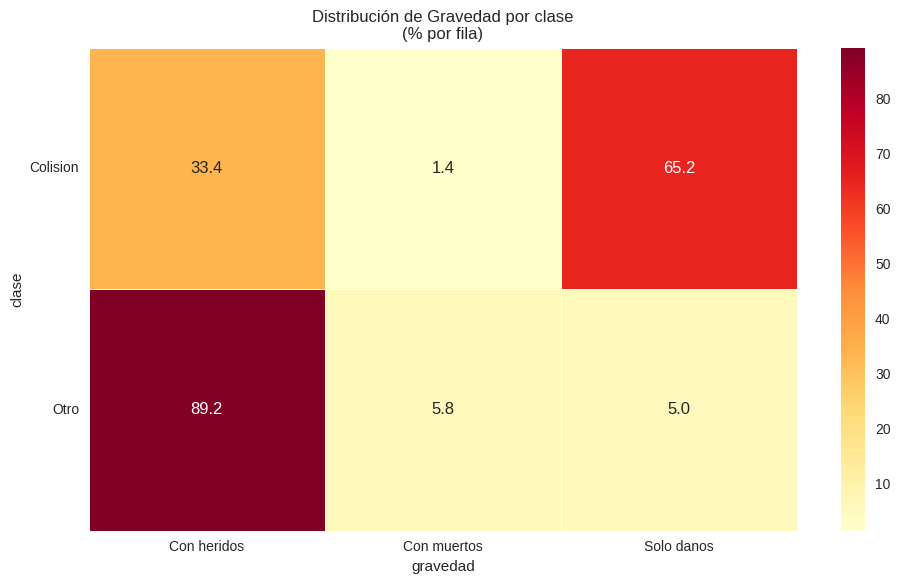

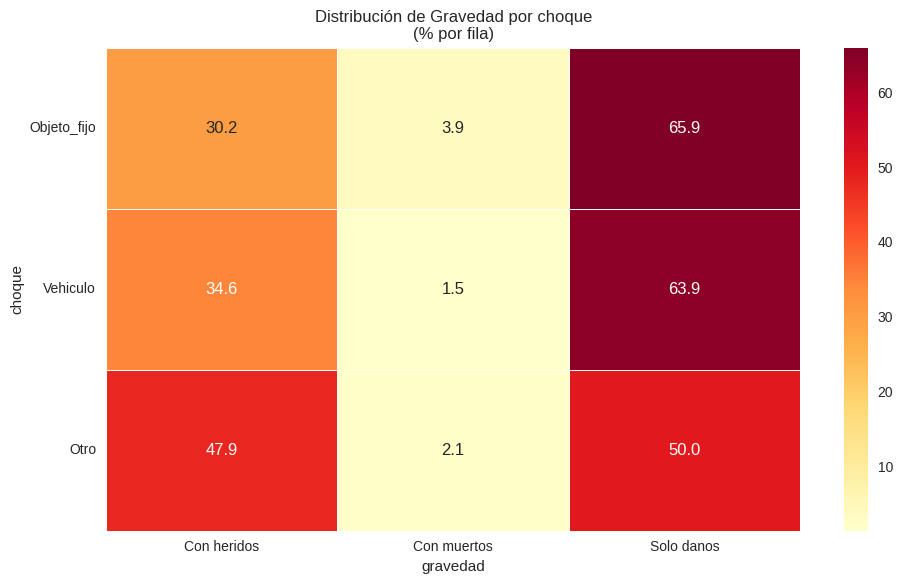

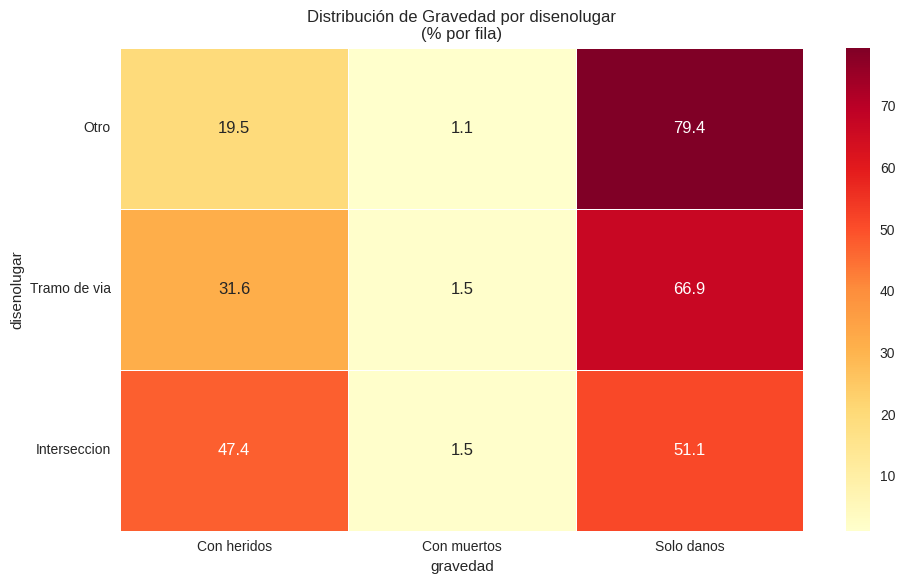

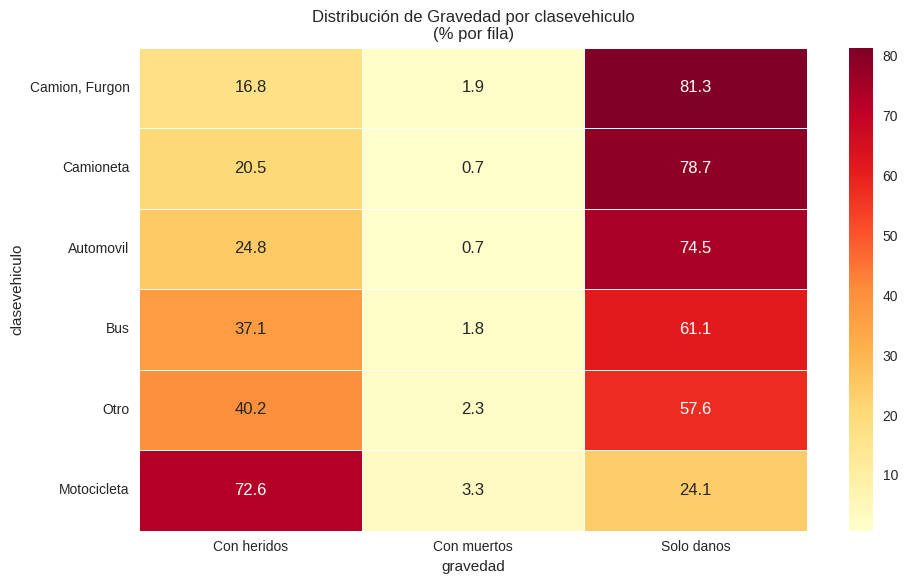

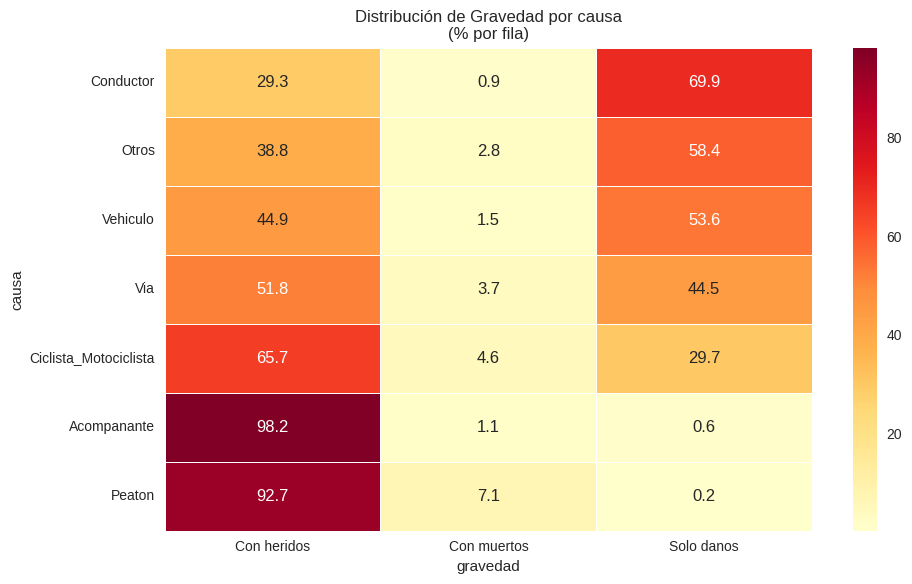

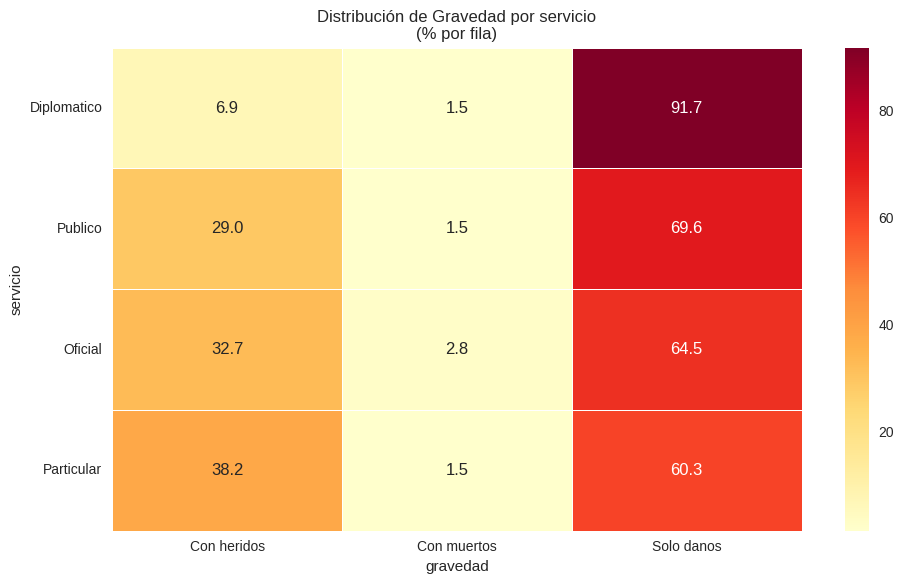

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Configuración visual
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Análisis bivariado con mapas de calor para cada variable
variables = [col for col in df_agrupado.columns if col != 'gravedad']

for var in variables:
    # Tabla de contingencia
    ct = pd.crosstab(df_agrupado[var], df_agrupado['gravedad'], normalize='index')*100

    # Ordenar por la categoría más severa
    ct = ct.sort_values(by=ct.columns[-1], ascending=False)

    # Heatmap
    plt.figure(figsize=(10, max(6, len(ct)//2)))
    sns.heatmap(ct, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=.5)
    plt.title(f'Distribución de Gravedad por {var.replace("_agrupada", "")}\n(% por fila)')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# **Random Forest**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Suponiendo que 'df_agrupado' y 'Gravedad_agrupada' ya están definidos
X = df_agrupado.drop('gravedad', axis=1)
y = df_agrupado['gravedad']

X = pd.get_dummies(X, drop_first=True)                                      # Convertir variables categóricas a numéricas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Dividir los datos en conjuntos de entrenamiento y prueba

rf_classifier = RandomForestClassifier(
    n_estimators=100,          # Número de árboles
    criterion='gini',          # Criterio de división: 'gini' o 'entropy' (o 'log_loss' desde sklearn 1.1)
    max_depth=4,            # Profundidad máxima del árbol (None = crece hasta que las hojas sean puras)
    min_samples_split=2,       # Mínimo número de muestras para dividir un nodo interno
    min_samples_leaf=1,        # Mínimo número de muestras en una hoja
    max_features='sqrt',       # Número de features a considerar cuando se divide un nodo
    bootstrap=True,            # Usar bootstrap (submuestreo) al construir árboles
    oob_score=True,            # Estimar el error fuera-de-bolsa (requiere bootstrap=True)
    class_weight='balanced',   # Para manejar clases desbalanceadas
    random_state=42,           # Para reproducibilidad
    n_jobs=-1,                 # Usa todos los núcleos disponibles
    verbose=1                  # Muestra progreso durante el entrenamiento
)   # Inicializar y entrenar el modelo RandomForest

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)                                      # Hacer predicciones en el conjunto de prueba

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


Accuracy: 0.5989569036508372
              precision    recall  f1-score   support

 Con heridos       0.71      0.22      0.34     69030
 Con muertos       0.04      0.55      0.07      2919
  Solo danos       0.77      0.80      0.79    128416

    accuracy                           0.60    200365
   macro avg       0.51      0.52      0.40    200365
weighted avg       0.74      0.60      0.62    200365



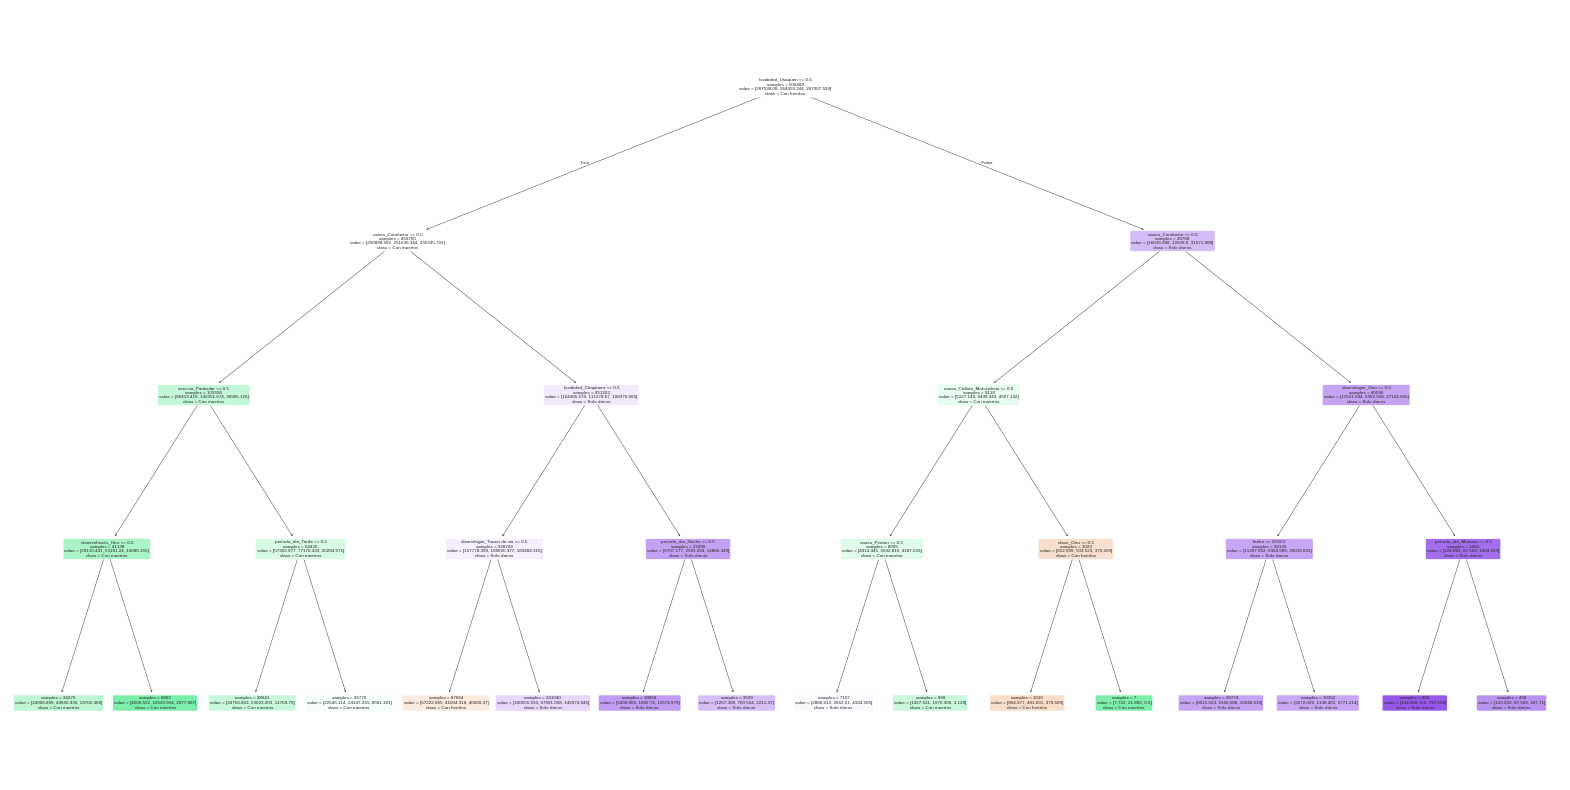

In [51]:
## Árbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0],
          feature_names=X_train.columns,
          class_names=rf_classifier.classes_,
          filled=True, rounded=True,
          impurity=False)
plt.show()


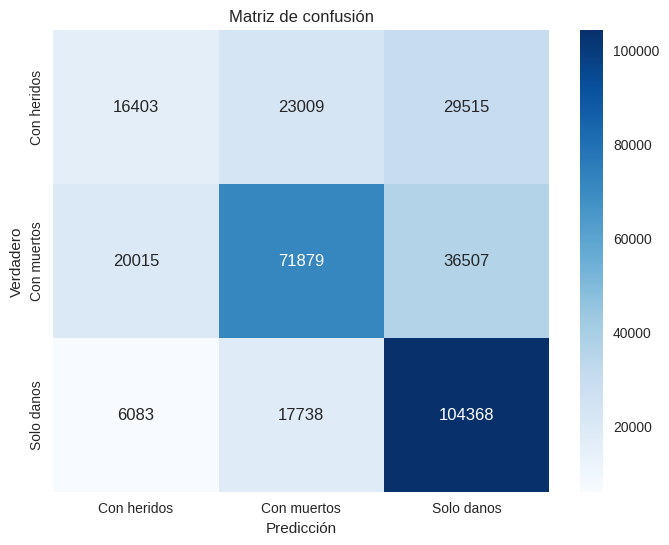

In [55]:
## Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de confusión")
plt.show()

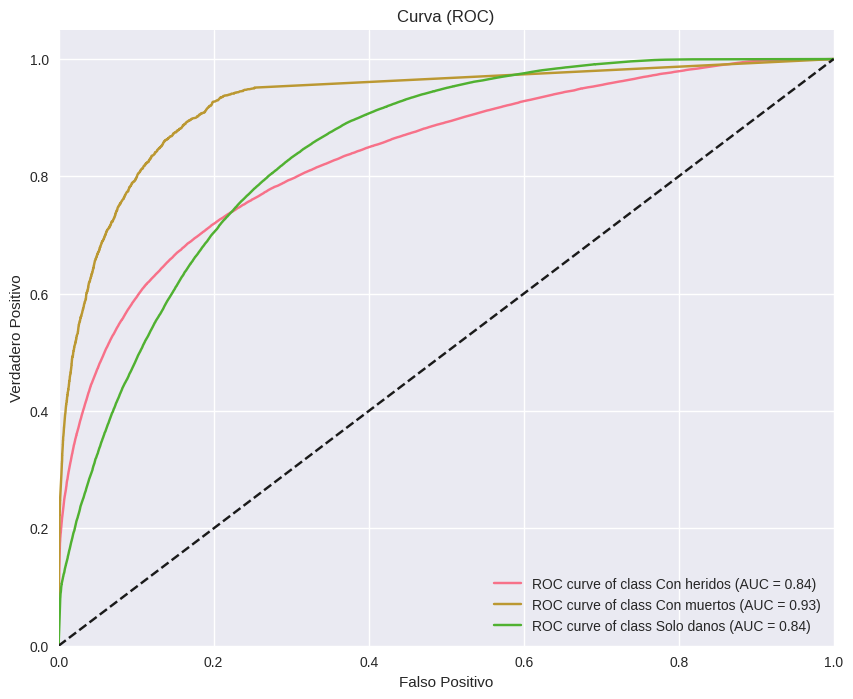

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Convertir las etiquetas de clase a una representación binaria
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Obtener las probabilidades de predicción para cada clase
y_prob = rf_classifier.predict_proba(X_test)

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Curva (ROC)')
plt.legend(loc='lower right')
plt.show()


# **Regresión logística**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo (simulando tu dataset)
np.random.seed(42)
X = np.random.randn(100, 1)  # Variable predictora
y = (X.ravel() > 0).astype(int)  # Variable objetivo binaria

# Ajustar modelo logístico
model = LogisticRegression()
model.fit(X, y)

# Crear puntos para la curva logística
X_test = np.linspace(-3, 3, 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para clase 1

# Configuración de la gráfica
plt.figure(figsize=(10, 6))

## 1. Elementos básicos
plt.scatter(X, y, alpha=0.7, label='Datos observados', color='steelblue', edgecolor='white')
plt.plot(X_test, y_prob, color='firebrick', linewidth=2.5, label='Función logística')

## 2. Parámetros de formato visual
plt.title('Modelo de Regresión Logística\nDistribución de Probabilidad', pad=20, fontsize=14)
plt.xlabel('Variable Predictora (X)', fontsize=12)
plt.ylabel('Probabilidad (Gravedad)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

## 3. Líneas de referencia importantes
plt.axhline(y=0.5, color='gray', linestyle=':', label='Umbral de decisión (0.5)')
plt.axvline(x=model.intercept_[0], color='green', linestyle='--', alpha=0.5, label='Intercepto')

## 4. Área de incertidumbre
plt.fill_between(X_test.ravel(), y_prob-0.05, y_prob+0.05, color='firebrick', alpha=0.1, label='Zona de incertidumbre')

## 5. Anotaciones clave
plt.annotate(f'Pendiente (coef.): {model.coef_[0][0]:.2f}',
             xy=(0.6, 0.2), xycoords='axes fraction',
             bbox=dict(boxstyle='round', alpha=0.2, color='gray'))

plt.annotate(f'Intercepto: {model.intercept_[0]:.2f}',
             xy=(0.6, 0.1), xycoords='axes fraction',
             bbox=dict(boxstyle='round', alpha=0.2, color='gray'))

## 6. Personalización adicional
plt.legend(loc='upper left', framealpha=0.9)
plt.xticks(fontsize=10)
plt.yticks(np.linspace(0, 1, 5), fontsize=10)
plt.xlim(-3, 3)
plt.ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

Exactitud: 0.7578768747036658
              precision    recall  f1-score   support

 Con heridos       0.74      0.49      0.59     69030
 Con muertos       0.00      0.00      0.00      2919
  Solo danos       0.76      0.92      0.83    128416

    accuracy                           0.76    200365
   macro avg       0.50      0.47      0.47    200365
weighted avg       0.74      0.76      0.74    200365



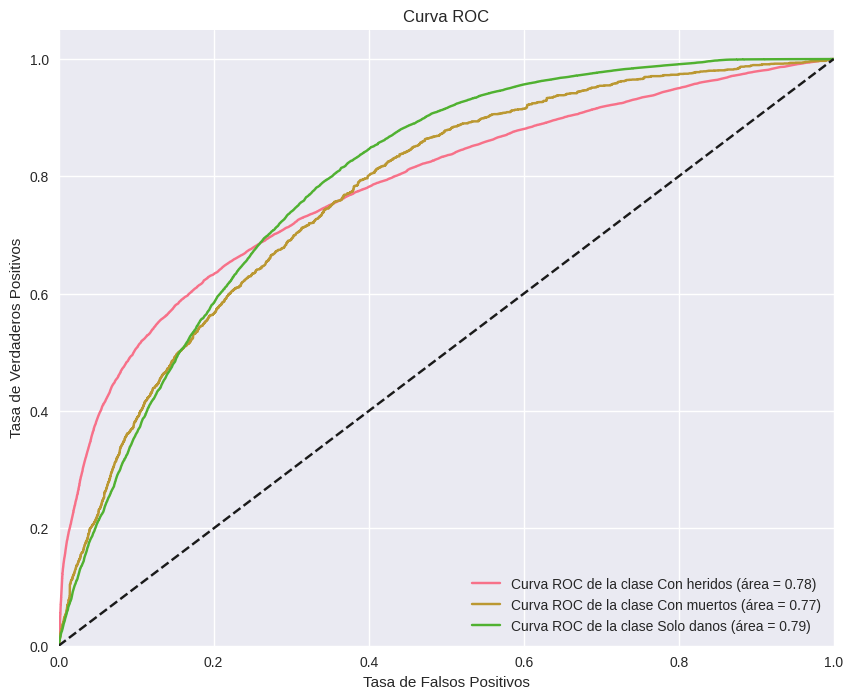

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suponiendo que 'df_agrupado' y 'Gravedad_agrupada' ya están definidos y procesados
# como en el código anterior (con one-hot encoding)

X = df_agrupado.drop('gravedad', axis=1)
y = df_agrupado['gravedad']

# Convertir las variables categóricas a numéricas usando one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Regresión Logística
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42) # Ajusta max_iter si es necesario
logreg_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = logreg_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy}")
print(classification_report(y_test, y_pred))
"""
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=logreg_classifier.classes_,
            yticklabels=logreg_classifier.classes_)
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()
"""
# Curva ROC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1:
    y_test_bin = np.hstack((1 - y_test_bin, y_test_bin))

y_pred_prob = logreg_classifier.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(logreg_classifier.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Curva ROC de la clase {logreg_classifier.classes_[i]} (área = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# **K-Means**

Convertiremos las variables categóricas a numéricas usando Label Encoder

In [204]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Crea una copia
df_encoded = df.copy()

# Usa la data codificada por los datos categóricos
le = LabelEncoder()
for col in df.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

fecha  periodo_dia  gravedad  clase  choque  localidad  disenolugar  \
0      0            1         2      3       4         14            9   
1      0            1         2      3       4         14            9   
2      0            1         2      3       4         14            9   
3      0            1         2      3       4         14            9   
4      0            1         2      3       4          5            9   

   clasevehiculo  causa  servicio  cluster  
0              3     63         3        0  
1              0     63         2        0  
2              3     63         3        0  
3              0     63         2        0  
4              0     61         3        0

Calculamos la inercia para diferentes valores de k (normalmente de 1 a 10):

In [205]:
inertias = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertias.append(kmeans.inertia_)

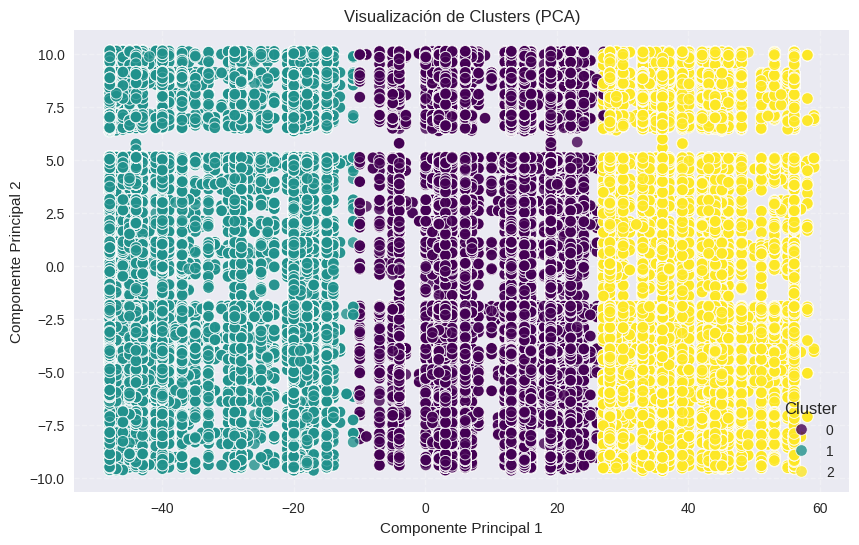

In [206]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

features = df_encoded[df.columns]
k = 3

# Aplicar Clusters KMeans
kmeans = KMeans(n_clusters=k, random_state=0)
df['cluster'] = kmeans.fit_predict(features)

# Reducción de dimensionalidad con PCA (2 componentes)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Crear DataFrame con los resultados
df_pca = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']

# Graficar con seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x='PCA1',
    y='PCA2',
    hue='cluster',
    palette='viridis',
    s=70,
    alpha=0.8
)

plt.title('Visualización de Clusters (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [208]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import linear_sum_assignment
import numpy as np

# 1. Codificar la variable objetivo (gravedad)
le = LabelEncoder()
true_labels = le.fit_transform(df['gravedad'])         # y verdaderas
predicted_labels = df['cluster'].values                # Clusters predichos

# 2. Alinear clusters con clases reales (resolver el problema de asignación)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(true_labels, predicted_labels)
row_ind, col_ind = linear_sum_assignment(-conf_mat)    # Maximiza coincidencias
mapping = dict(zip(col_ind, row_ind))                  # Mapear cluster → clase

# 3. Convertir etiquetas de clusters a etiquetas reales alineadas
aligned_preds = np.array([mapping[cluster] for cluster in predicted_labels])

# 4. Mostrar el reporte de clasificación
print(classification_report(true_labels, aligned_preds, target_names=le.classes_))

# 5. Mostrar el accuracy total
accuracy = accuracy_score(true_labels, aligned_preds)
print(f"\nAccuracy total del modelo KMeans: {accuracy:.4f}")

              precision    recall  f1-score   support

 Con heridos       0.36      0.37      0.37    345814
 Con muertos       0.02      0.20      0.04     15122
  Solo danos       0.67      0.53      0.59    640885

    accuracy                           0.47   1001821
   macro avg       0.35      0.37      0.33   1001821
weighted avg       0.56      0.47      0.51   1001821


Accuracy total del modelo KMeans: 0.4722


In [32]:
frequency_table = df['cluster'].value_counts().reset_index()
frequency_table.columns = ['Cluster', 'Frecuencia']

# Agrega columna de porcentaje
frequency_table['Porcentaje'] = (frequency_table['Frecuencia'] / frequency_table['Frecuencia'].sum()) * 100

# Redonde a dos decimales
frequency_table['Porcentaje'] = frequency_table['Porcentaje'].round(2)

print(frequency_table.to_string(index=False))

 Cluster  Frecuencia  Porcentaje
       0      498663       49.78
       1      204483       20.41
       3      162232       16.19
       2      136443       13.62


# **Esta parte mostrará los modelos habiendo aplicado oversampling de *minority* teniendo como referencia la gravedad *con muertos*.**

In [33]:
"""
Esta parte mostrará los modelos
habiendo aplicado oversampling
de minority tenendi como referencia
la gravedad.
"""

'\nEsta parte mostrará los modelos\nhabiendo aplicado oversampling\nde 0.5 tenendi como referencia\nla gravedad.\n'

# **Oversampling**

In [145]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Separar características y objetivo
X = df_agrupado.drop("gravedad", axis=1)
y = df_agrupado["gravedad"]

# 2. Codificar (usando OneHot o lo que prefieras)
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Aplicar SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# 4. Convertir a DataFrame para ver los datos
df_oversampled = pd.DataFrame(X_resampled, columns=X_encoded.columns)
df_oversampled["gravedad"] = y_resampled

# 5. Verificar el nuevo balance de clases
print(df_oversampled["gravedad"].value_counts())

gravedad
Solo danos     640885
Con muertos    640885
Con heridos    345814
Name: count, dtype: int64


Text(0.5, 1.0, 'Data agrupada')

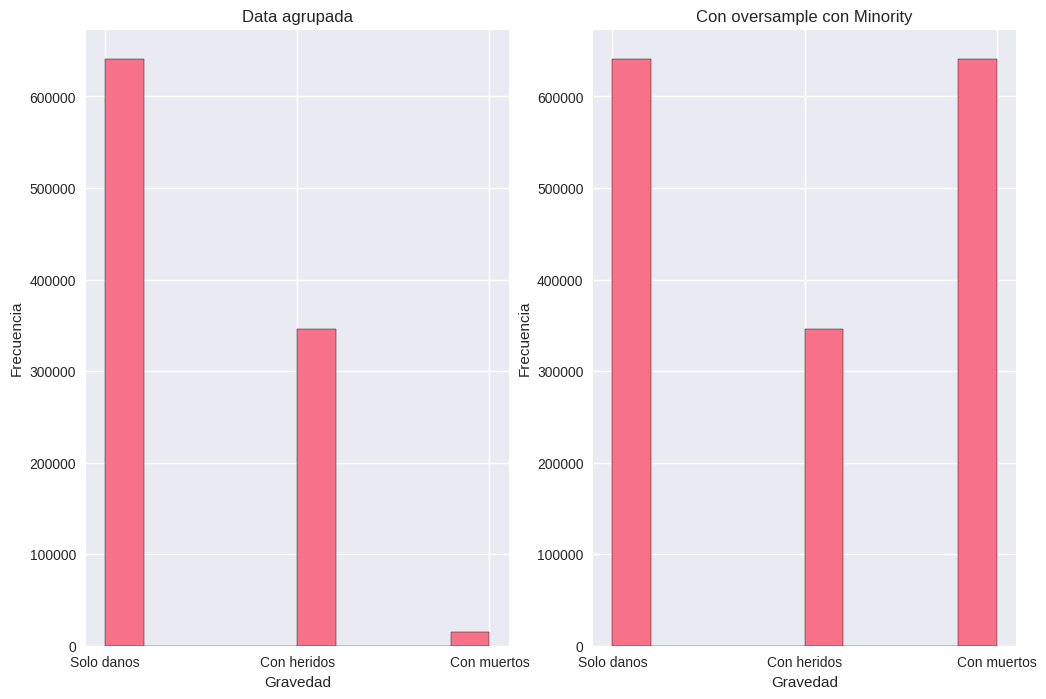

In [146]:
import matplotlib.pyplot as plt

plt.subplot(122)
plt.hist(df_oversampled['gravedad'], edgecolor='black')
plt.xlabel('Gravedad')
plt.ylabel('Frecuencia')
plt.title('Con oversample con Minority')
plt.subplot(121)
plt.hist(df_agrupado['gravedad'], edgecolor='black')
plt.xlabel('Gravedad')
plt.ylabel('Frecuencia')
plt.title('Data agrupada')

In [117]:
# Mostrar cuántos valores únicos (categorías) hay por columna
categoria_counts = df.nunique().sort_values(ascending=False)

print("🔢 Cantidad de categorías por columna:\n")
print(categoria_counts)

🔢 Cantidad de categorías por columna:

causa            108
localidad         20
clasevehiculo     15
disenolugar       13
clase              7
fecha              6
choque             5
servicio           4
periodo_dia        4
cluster            4
gravedad           3
dtype: int64


In [115]:
# Mostrar cuántos valores únicos (categorías) hay por columna
categoria_counts = df_agrupado.nunique().sort_values(ascending=False)

print("🔢 Cantidad de categorías por columna:\n")
print(categoria_counts)

🔢 Cantidad de categorías por columna:

localidad        20
causa             7
clasevehiculo     6
fecha             6
periodo_dia       4
servicio          4
gravedad          3
choque            3
disenolugar       3
clase             2
dtype: int64


# **Random Forest**

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# -------------------------------
# 1. Preparar datos desde df_oversampled
# -------------------------------
X = df_oversampled.drop("gravedad", axis=1)
y = df_oversampled["gravedad"]

# Codificar variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# -------------------------------
# 2. División entrenamiento/prueba
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------------
# 3. Modelo Random Forest con hiperparámetros
# -------------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train, y_train)

# -------------------------------
# 4. Evaluación
# -------------------------------
y_pred = rf_model.predict(X_test)

print("\n📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"✅ Precisión: {accuracy_score(y_test, y_pred):.4f}")

# -------------------------------
# 5. Guardar modelo
# -------------------------------
joblib.dump(rf_model, "modelo_random_forest.pkl")
print("\n Modelo guardado como 'modelo_random_forest.pkl'")


📊 Reporte de clasificación:
              precision    recall  f1-score   support

 Con heridos       0.38      0.00      0.00     69163
 Con muertos       0.60      0.70      0.65    128177
  Solo danos       0.60      0.82      0.69    128177

    accuracy                           0.60    325517
   macro avg       0.53      0.51      0.45    325517
weighted avg       0.55      0.60      0.53    325517

✅ Precisión: 0.6013

 Modelo guardado como 'modelo_random_forest.pkl'


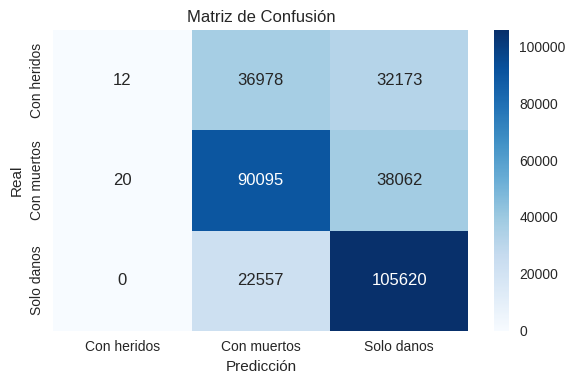

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -------------------------------
# 6. Matriz de confusión
# -------------------------------

cm = confusion_matrix(y_test, y_pred)
labels = rf_model.classes_  # para asegurar el orden correcto

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

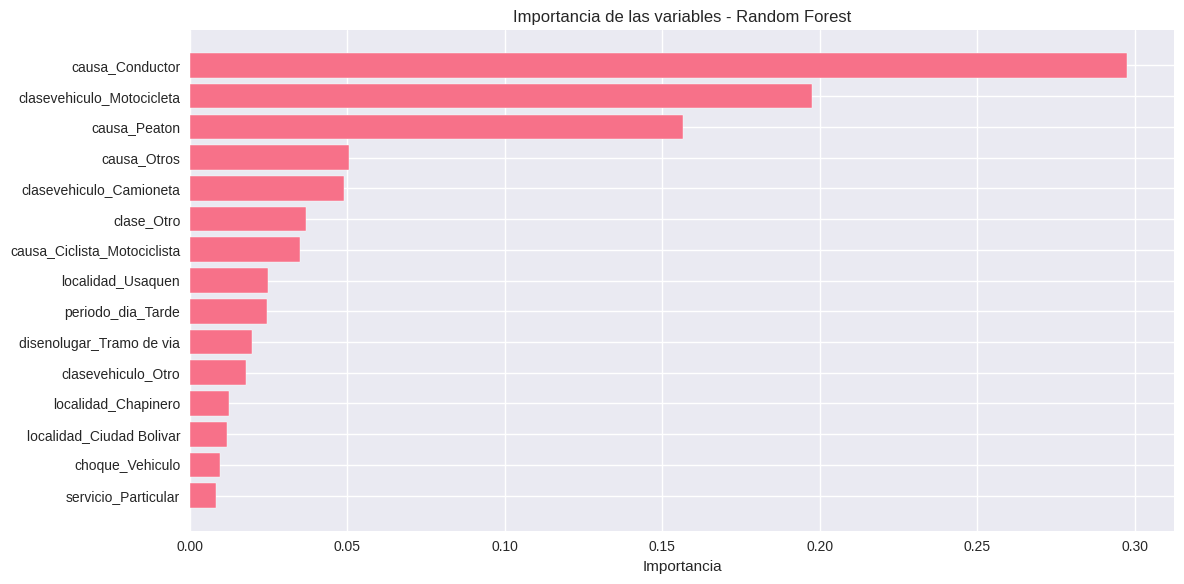

In [138]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar el modelo Random Forest desde archivo pkl
modelo = joblib.load("modelo_random_forest.pkl")  # Ajusta el nombre si es diferente

# 2. Obtener nombres de columnas del DataFrame original codificado
# Esto debe coincidir con las columnas usadas para entrenar el modelo
# Si usaste pd.get_dummies con drop_first=True:
X = df_oversampled.drop("gravedad", axis=1)
feature_names = X.columns

# 3. Obtener importancias desde el modelo
importancias = modelo.feature_importances_

# 4. Crear un DataFrame ordenado por importancia
df_importancia = pd.DataFrame({
    "feature": feature_names,
    "importance": importancias
}).sort_values(by="importance", ascending=False)

# 5. Graficar las N más importantes
top_n = 15
plt.figure(figsize=(12, 6))
plt.barh(df_importancia["feature"][:top_n][::-1], df_importancia["importance"][:top_n][::-1])
plt.xlabel("Importancia")
plt.title("Importancia de las variables - Random Forest")
plt.tight_layout()
plt.show()


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


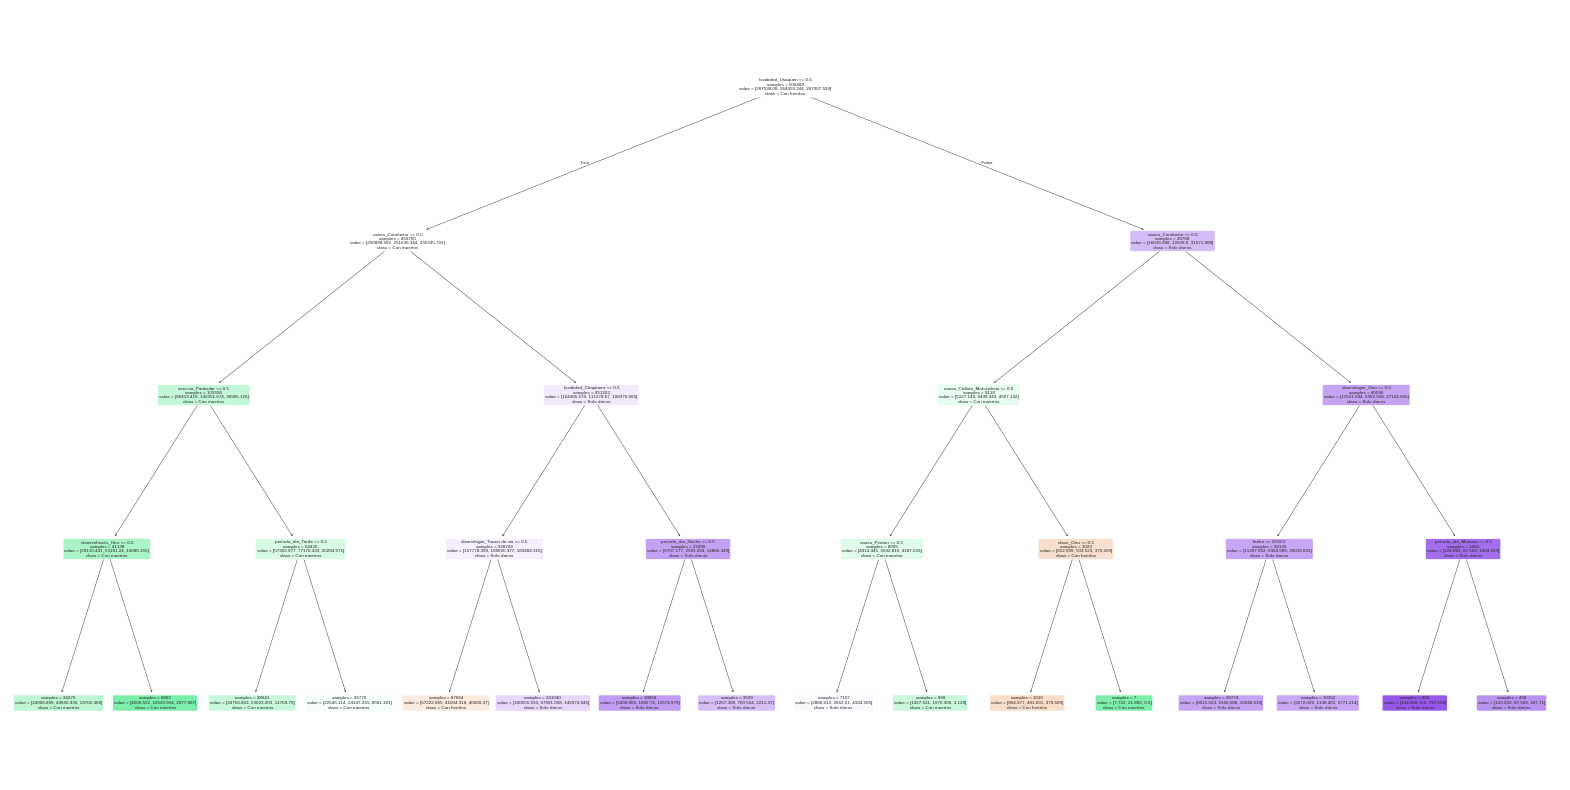

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Suponiendo que 'df_agrupado' y 'Gravedad_agrupada' ya están definidos
X = df_agrupado.drop('gravedad', axis=1)
y = df_agrupado['gravedad']

X = pd.get_dummies(X, drop_first=True)                                      # Convertir variables categóricas a numéricas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Dividir los datos en conjuntos de entrenamiento y prueba

rf_classifier = RandomForestClassifier(
    n_estimators=100,          # Número de árboles
    criterion='gini',          # Criterio de división: 'gini' o 'entropy' (o 'log_loss' desde sklearn 1.1)
    max_depth=4,            # Profundidad máxima del árbol (None = crece hasta que las hojas sean puras)
    min_samples_split=2,       # Mínimo número de muestras para dividir un nodo interno
    min_samples_leaf=1,        # Mínimo número de muestras en una hoja
    max_features='sqrt',       # Número de features a considerar cuando se divide un nodo
    bootstrap=True,            # Usar bootstrap (submuestreo) al construir árboles
    oob_score=True,            # Estimar el error fuera-de-bolsa (requiere bootstrap=True)
    class_weight='balanced',   # Para manejar clases desbalanceadas
    random_state=42,           # Para reproducibilidad
    n_jobs=-1,                 # Usa todos los núcleos disponibles
    verbose=1                  # Muestra progreso durante el entrenamiento
)   # Inicializar y entrenar el modelo RandomForest

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)                                      # Hacer predicciones en el conjunto de prueba

## Árbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0],
          feature_names=X_train.columns,
          class_names=rf_classifier.classes_,
          filled=True, rounded=True,
          impurity=False)
plt.show()

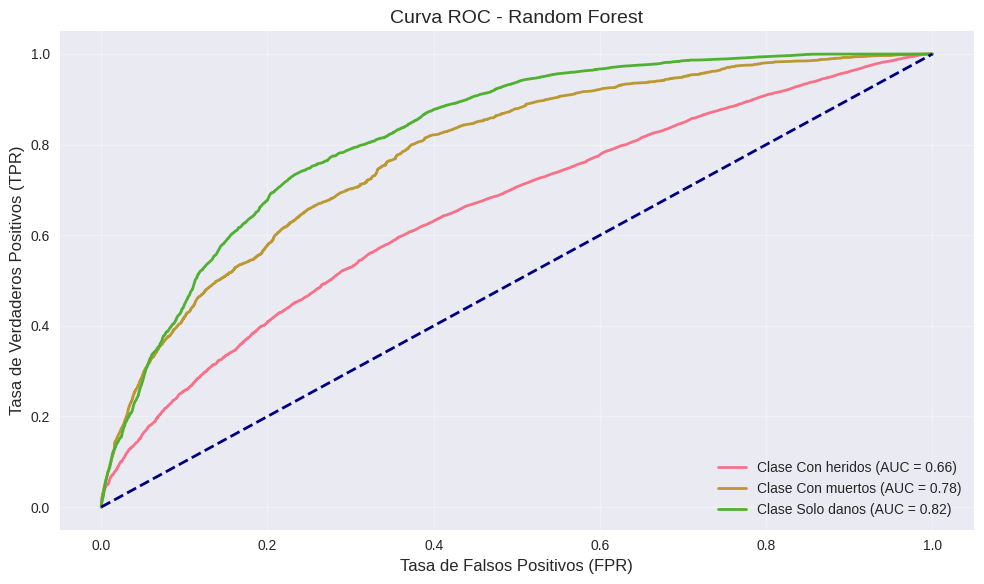

In [197]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Cargar el modelo
modelo = joblib.load("modelo_random_forest.pkl")

# Asegúrate de tener X_test y y_test ya preparados
# Por ejemplo:
# X_test = df_encoded_test_features
# y_test = df_encoded_test_labels

# Obtener probabilidades de la clase positiva
y_proba = modelo.predict_proba(X_test)

# Si tienes múltiples clases, binariza la variable objetivo
if len(modelo.classes_) > 2:
    from sklearn.preprocessing import label_binarize
    y_test_bin = label_binarize(y_test, classes=modelo.classes_)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i, clase in enumerate(modelo.classes_):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Graficar ROC para cada clase
    plt.figure(figsize=(10, 6))
    for i, clase in enumerate(modelo.classes_):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Clase {clase} (AUC = {roc_auc[i]:.2f})')
else:
    # Binaria
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')

# Gráficos comunes
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Random Forest', fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# **Regresión Logística**

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# -------------------------------
# 1. Preparar datos desde df_oversampled
# -------------------------------
X = df_oversampled.drop("gravedad", axis=1)
y = df_oversampled["gravedad"]

# Codificar variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# -------------------------------
# 2. División entrenamiento/prueba
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------------
# 3. Modelo de Regresión Logística
# -------------------------------
logreg_model = LogisticRegression(
    solver='liblinear',  # bueno para datos pequeños o medianos
    max_iter=500,
    C=1.0,
    random_state=42
)

logreg_model.fit(X_train, y_train)

# -------------------------------
# 4. Evaluación
# -------------------------------
y_pred = logreg_model.predict(X_test)

print("\n📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"✅ Precisión: {accuracy_score(y_test, y_pred):.4f}")


📊 Reporte de clasificación:
              precision    recall  f1-score   support

 Con heridos       0.45      0.09      0.15     69163
 Con muertos       0.64      0.74      0.68    128177
  Solo danos       0.65      0.83      0.73    128177

    accuracy                           0.64    325517
   macro avg       0.58      0.55      0.52    325517
weighted avg       0.60      0.64      0.59    325517

✅ Precisión: 0.6357


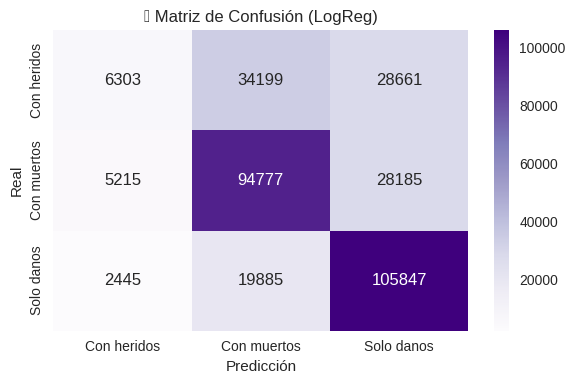

In [150]:
# -------------------------------
# 5. Matriz de Confusión
# -------------------------------
cm = confusion_matrix(y_test, y_pred, labels=logreg_model.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=logreg_model.classes_,
            yticklabels=logreg_model.classes_)
plt.title("🔍 Matriz de Confusión (LogReg)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

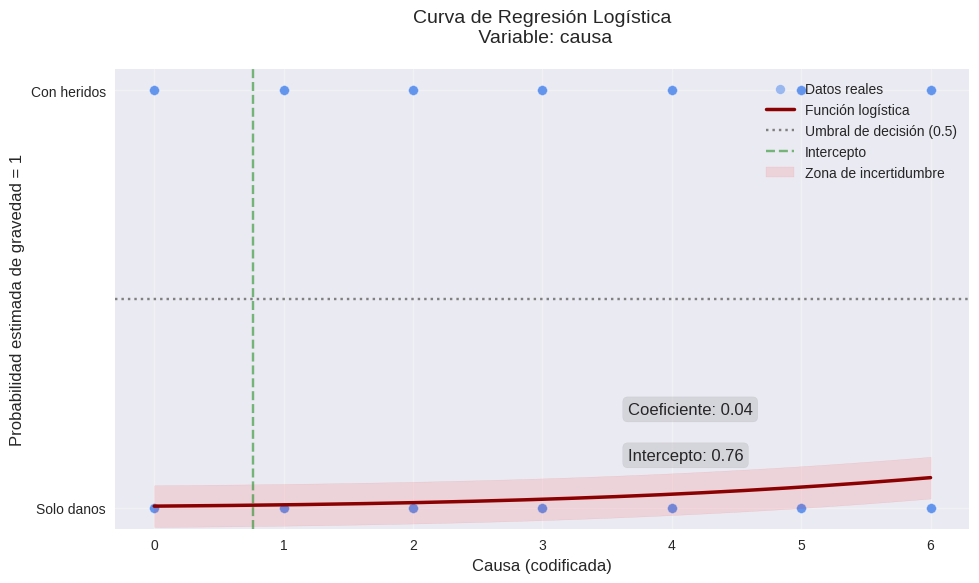

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder

# 1. Cargar modelo entrenado
model = joblib.load("modelo_logistic_regression.pkl")

# 2. Tomar una sola variable categórica para graficar: por ejemplo 'causa'
X = df_agrupado[['causa']].copy()
y = df_agrupado['gravedad'].copy()

# 3. Codificar variable categórica a numérica
le = LabelEncoder()
X['causa_encoded'] = le.fit_transform(X['causa'])

# 4. Definir variable predictora y objetivo
X_plot = X[['causa_encoded']]
y_plot = y

# 5. Ajustar modelo sobre esa única variable para graficar
from sklearn.linear_model import LogisticRegression
model_plot = LogisticRegression()
model_plot.fit(X_plot, y_plot)

# 6. Crear puntos para la curva logística
X_test = np.linspace(X_plot.min(), X_plot.max(), 300).reshape(-1, 1)
y_prob = model_plot.predict_proba(X_test)[:, 1]

# 7. Visualizar
plt.figure(figsize=(10, 6))

# Datos originales
plt.scatter(X_plot, y_plot, alpha=0.6, label='Datos reales', color='cornflowerblue', edgecolor='white')

# Curva logística
plt.plot(X_test, y_prob, color='darkred', linewidth=2.5, label='Función logística')

# Líneas y anotaciones
plt.axhline(y=0.5, color='gray', linestyle=':', label='Umbral de decisión (0.5)')
plt.axvline(x=model_plot.intercept_[0], color='green', linestyle='--', alpha=0.5, label='Intercepto')

# Área de incertidumbre
plt.fill_between(X_test.ravel(), y_prob - 0.05, y_prob + 0.05, alpha=0.1, color='red', label='Zona de incertidumbre')

# Anotaciones
plt.annotate(f'Coeficiente: {model_plot.coef_[0][0]:.2f}',
             xy=(0.6, 0.25), xycoords='axes fraction',
             bbox=dict(boxstyle='round', alpha=0.2, color='gray'))

plt.annotate(f'Intercepto: {model_plot.intercept_[0]:.2f}',
             xy=(0.6, 0.15), xycoords='axes fraction',
             bbox=dict(boxstyle='round', alpha=0.2, color='gray'))

# Configuración general
plt.title('Curva de Regresión Logística\n Variable: causa', fontsize=14, pad=20)
plt.xlabel('Causa (codificada)', fontsize=12)
plt.ylabel('Probabilidad estimada de gravedad = 1', fontsize=12)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.ylim(-0.05, 1.05)

plt.show()

In [90]:
# -------------------------------
# 6. Guardar el modelo
# -------------------------------

joblib.dump(logreg_model, "modelo_logistic_regression.pkl")
print("\n💾 Modelo guardado como 'modelo_logistic_regression.pkl'")


💾 Modelo guardado como 'modelo_logistic_regression.pkl'


# **K-Means**

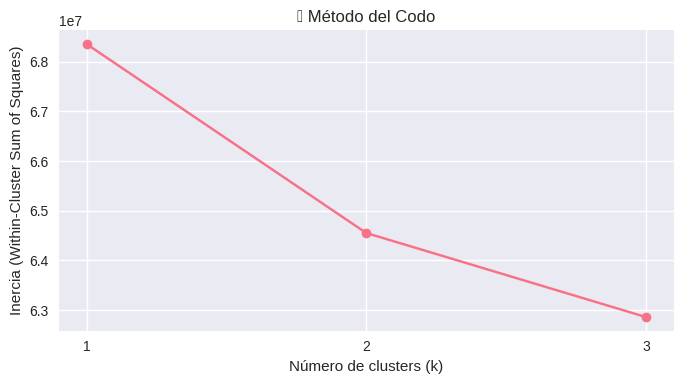

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Preparar datos (sin columna gravedad)
# -------------------------------
X = df_oversampled.drop("gravedad", axis=1)
y = df_oversampled["gravedad"]  # solo para evaluación

# Codificar variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Estandarizar datos (KMeans es sensible a escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# -------------------------------
# 2. Visualización del codo
# -------------------------------
inertia = []
k_range = range(1, 4)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("📉 Método del Codo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Within-Cluster Sum of Squares)")
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

In [166]:
# -------------------------------
# 3. Entrenar KMeans
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)


📊 Distribución de 'gravedad' en cada cluster:
gravedad  Con heridos  Con muertos  Solo danos
cluster                                       
0                7042        12563       28719
1              224498       373421      341107
2              114274       254901      271059


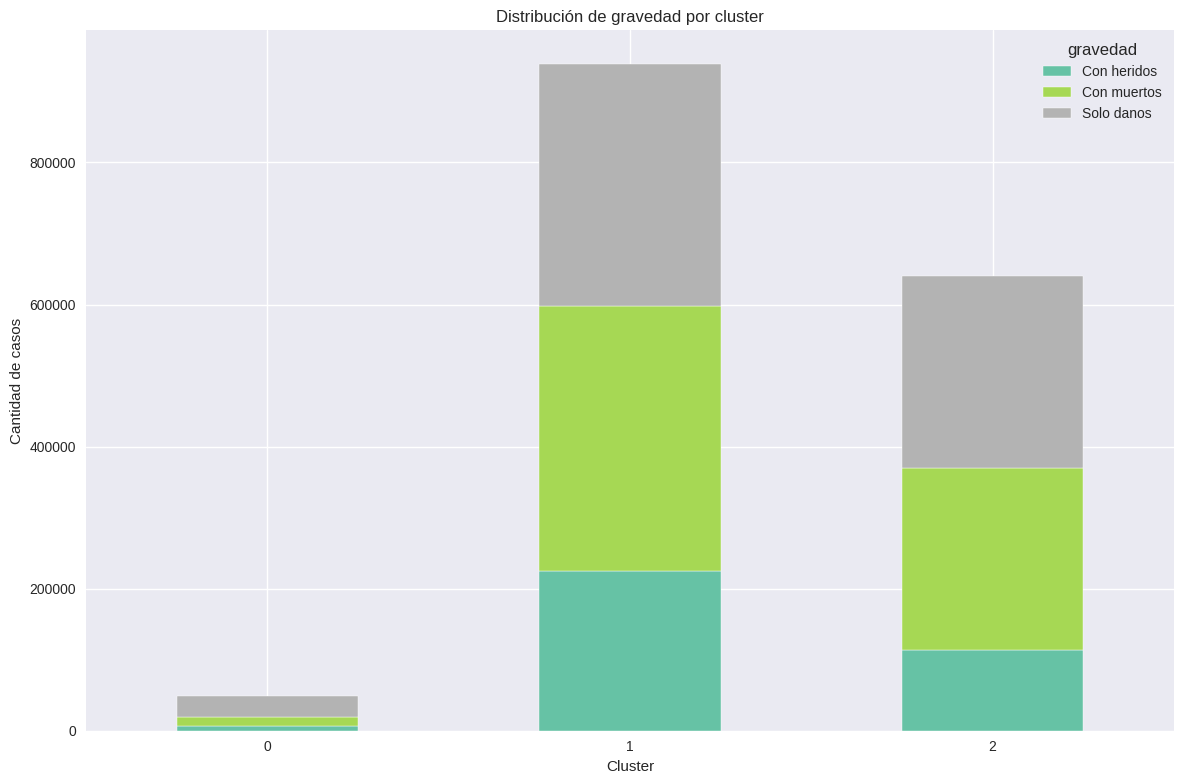

In [167]:
# Añadir etiquetas de cluster y gravedad al DataFrame original
df_clusters = df_oversampled.copy()
df_clusters["cluster"] = cluster_labels

# Agrupar por cluster y gravedad
distribucion = df_clusters.groupby(["cluster", "gravedad"]).size().unstack(fill_value=0)

# Mostrar tabla
print("\n📊 Distribución de 'gravedad' en cada cluster:")
print(distribucion)

# Opcional: Visualización gráfica
import matplotlib.pyplot as plt

distribucion.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Distribución de gravedad por cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de casos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



📊 Evaluación de Clustering vs. Gravedad:
              precision    recall  f1-score   support

 Con heridos       0.00      0.00      0.00    345814
 Con muertos       0.40      0.58      0.47    640885
  Solo danos       0.44      0.47      0.45    640885

    accuracy                           0.41   1627584
   macro avg       0.28      0.35      0.31   1627584
weighted avg       0.33      0.41      0.36   1627584

✅ Accuracy (ajustado): 0.4136
🎯 Adjusted Rand Index: -0.0015


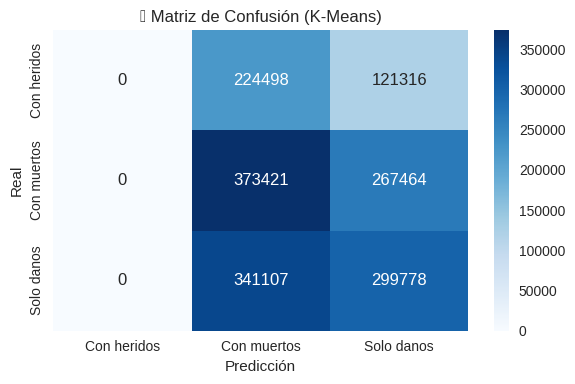

In [168]:
# -------------------------------
# 4. Evaluar clusters contra gravedad real
# -------------------------------
# En clustering, los labels no tienen por qué coincidir exactamente con y
# Podemos corregirlo si es necesario (solo si hay dos clases)
import numpy as np
import pandas as pd # Import pandas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, adjusted_rand_score # Import necessary metrics

# Mapear los clusters a etiquetas reales (solo para comparación)
def map_clusters_to_labels(true_labels_series, cluster_labels): # Accept pandas Series
    label_mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        # Use value_counts and idxmax to find the most common label in the subset
        most_common = true_labels_series[mask].value_counts().idxmax()
        label_mapping[cluster] = most_common
    # Convert cluster labels to the mapped string labels
    mapped_labels_series = pd.Series(cluster_labels).map(label_mapping)
    return mapped_labels_series.to_numpy() # Return numpy array

# Pass the pandas Series 'y' directly
mapped_labels = map_clusters_to_labels(y, cluster_labels)

# Reporte
print("\n📊 Evaluación de Clustering vs. Gravedad:")
# Ensure y and mapped_labels are both numpy arrays or pandas Series for report
print(classification_report(y, mapped_labels))
print(f"✅ Accuracy (ajustado): {accuracy_score(y, mapped_labels):.4f}")
# adjusted_rand_score expects the original cluster labels and true labels
print(f"🎯 Adjusted Rand Index: {adjusted_rand_score(y, cluster_labels):.4f}")

# Matriz de confusión
# Ensure the inputs to confusion_matrix have consistent types and are 1D arrays
cm = confusion_matrix(y.to_numpy(), mapped_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            # Use sorted unique values for consistent axis labels
            xticklabels=sorted(np.unique(y)), yticklabels=sorted(np.unique(y)))
plt.title("🔍 Matriz de Confusión (K-Means)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [104]:
import joblib

# Suponiendo que ya tienes el modelo entrenado
# kmeans_model = KMeans(n_clusters=3, random_state=42).fit(X_encoded)

# Guardar el modelo en un archivo .pkl
joblib.dump(kmeans, "modelo_kmeans.pkl")

print("✅ Modelo KMeans guardado como 'modelo_kmeans.pkl'")

✅ Modelo KMeans guardado como 'modelo_kmeans.pkl'


In [172]:
df_agrupado.columns

Index(['fecha', 'periodo_dia', 'gravedad', 'clase', 'choque', 'localidad',
       'disenolugar', 'clasevehiculo', 'causa', 'servicio'],
      dtype='object')

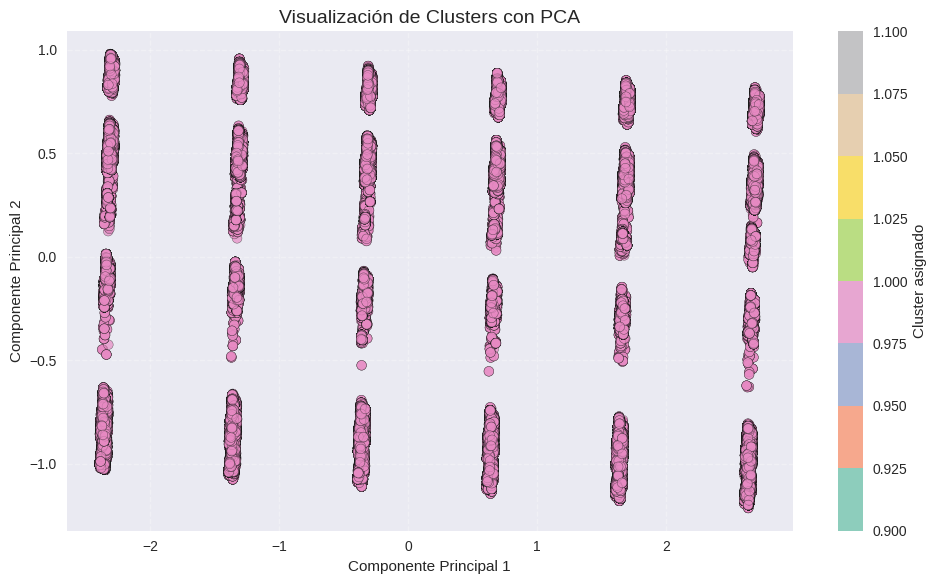

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.decomposition import PCA

# 1. Cargar modelo KMeans
kmeans = joblib.load("modelo_kmeans.pkl")

# 2. Obtener los datos utilizados (asegúrate de usar la misma codificación que el entrenamiento)
X_kmeans = df_oversampled.drop(columns=['gravedad'])
X_encoded = pd.get_dummies(X_kmeans, drop_first=True)

# 3. Aplicar reducción de dimensionalidad con PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_encoded)

# 4. Predecir los clusters
clusters = kmeans.predict(X_encoded)

# 5. Visualización
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', alpha=0.7, edgecolor='k')
plt.title('Visualización de Clusters con PCA', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, linestyle='--', alpha=0.3)
plt.colorbar(scatter, label='Cluster asignado')
plt.tight_layout()
plt.show()

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# 1. Cargar modelo KMeans
kmeans = joblib.load("modelo_kmeans.pkl")

# 2. Obtener los datos utilizados (asegúrate de usar la misma codificación que el entrenamiento)
X_kmeans = df_oversampled.drop(columns=['gravedad'])
X_encoded = pd.get_dummies(X_kmeans, drop_first=True)

# 3. Aplicar reducción de dimensionalidad con PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_encoded)

# 4. Predecir los clusters (esto es just for context, not directly used in the plotting fix)
# clusters = kmeans.predict(X_encoded)

# 5. Convertir las etiquetas de gravedad a numéricas
gravedad_labels = df_oversampled['gravedad'].values

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the string labels to numerical labels
gravedad_numeric = le.fit_transform(gravedad_labels)

# Get the mapping from numerical labels back to string labels for the colorbar
gravedad_mapping = dict(zip(le.transform(le.classes_), le.classes_))


# 6. Visualización
plt.figure(figsize=(10, 6))
# Use the numerical representation for the 'c' argument
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gravedad_numeric, cmap='coolwarm', alpha=0.7, edgecolor='k')

plt.title('Clusters y Gravedad Real', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Create a colorbar and customize the ticks to show original string labels
cbar = plt.colorbar(scatter, label='Gravedad')
# Set the tick locations to the numerical labels
cbar.set_ticks(list(gravedad_mapping.keys()))
# Set the tick labels to the corresponding string labels
cbar.set_ticklabels(list(gravedad_mapping.values()))


plt.grid(True)
plt.tight_layout()
plt.show()

# **LightGBM**

In [210]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Separar características y variable objetivo
X = df_agrupado.drop("gravedad", axis=1)
y = df_agrupado["gravedad"]

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Convertir todas las columnas a tipo "category"
for col in X_train.columns:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

In [211]:
# 4. Crear y entrenar el modelo
model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 801456, number of used features: 10
[LightGBM] [Info] Start training from score -1.063673
[LightGBM] [Info] Start training from score -4.193390
[LightGBM] [Info] Start training from score -0.446726


LGBMClassifier(random_state=42)


🔎 Accuracy general: 0.7730

📊 Reporte de clasificación:
              precision    recall  f1-score   support

  Solo danos       0.75      0.54      0.63     69163
 Con heridos       0.76      0.06      0.11      3024
 Con muertos       0.78      0.91      0.84    128178

    accuracy                           0.77    200365
   macro avg       0.76      0.50      0.53    200365
weighted avg       0.77      0.77      0.76    200365



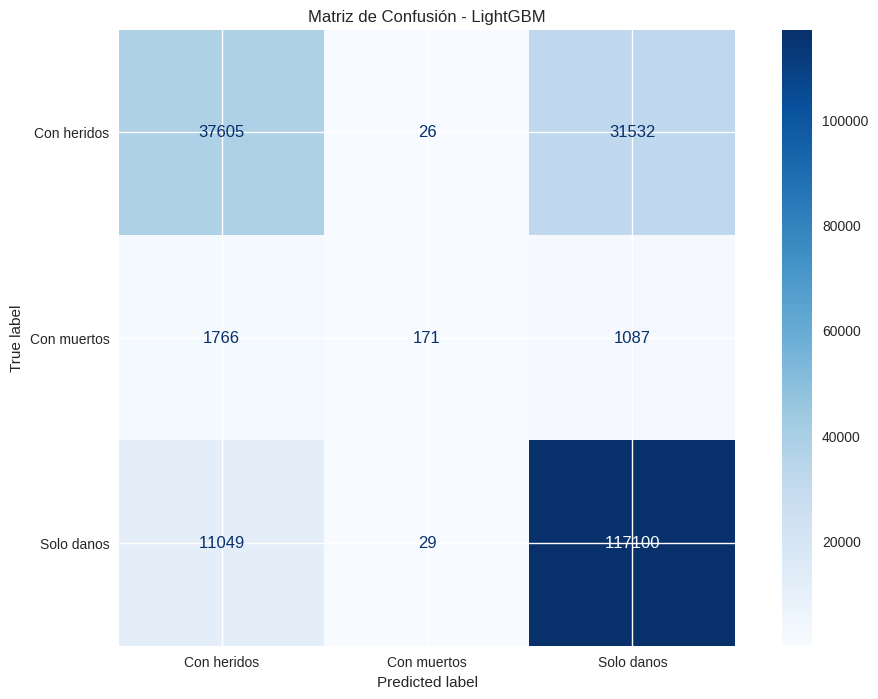

In [214]:
# 5. Predecir
y_pred = model_lgb.predict(X_test)

# 6. Accuracy general
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔎 Accuracy general: {accuracy:.4f}\n")

# 8. Reporte de clasificación
print("📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=y.unique().tolist()))

# 9. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_lgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lgb.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión - LightGBM")
plt.show()

In [217]:
# Limpiar nombres de columnas: solo caracteres alfanuméricos y guiones bajos
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

In [219]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import joblib

# 1. Separar X e y
X = df_oversampled.drop('gravedad', axis=1)
y = df_oversampled['gravedad']

# 2. Limpiar nombres de columnas para LightGBM
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# 3. Codificar categóricas con one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. División train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# 5. Definir y entrenar modelo
modelo_lgbm = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

modelo_lgbm.fit(X_train, y_train)

# 6. Predicciones y métricas
y_pred = modelo_lgbm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# 7. Guardar modelo
joblib.dump(modelo_lgbm, "modelo_lgbm.pkl")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 1302067, number of used features: 42
[LightGBM] [Info] Start training from score -1.548951
[LightGBM] [Info] Start training from score -0.932002
[LightGBM] [Info] Start training from score -0.932002
Accuracy: 0.693942251863958
              precision    recall  f1-score   support

 Con heridos       0.60      0.21      0.31     69163
 Con muertos       0.71      0.81      0.76    128177
  Solo danos       0.70      0.84      0.76    128177

    accuracy                           0.69    325517
   macro avg       0.67      0.62      0.61    325517
weighted avg       0.68      0.69      0.66    325517

Matriz de confusión:
[[ 14423  27179  27561]
 [  4736 103974  19467]
 [  484

['modelo_lgbm.pkl']

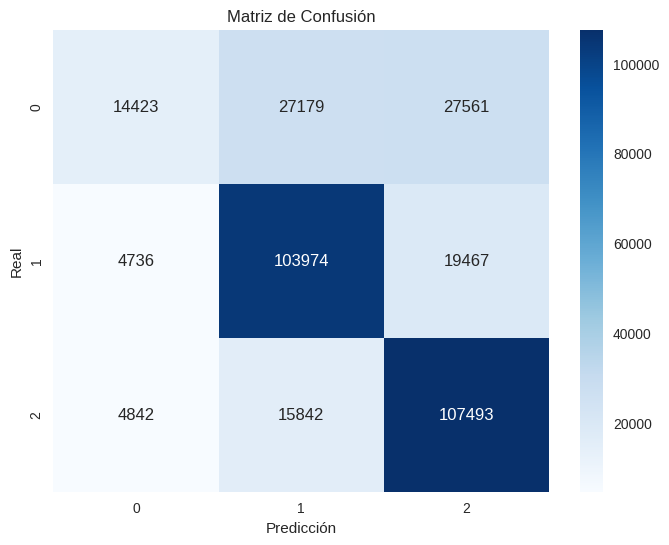

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que ya tienes y_test y y_pred calculados

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [221]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Binarizar las etiquetas para multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Obtener probabilidades predichas
y_score = modelo_lgbm.predict_proba(X_test)

# Calcular curvas ROC y AUC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Ajusta colores según clases

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal (aleatorio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por clase')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [224]:
print(modelo_lgbm.classes_)

['Con heridos' 'Con muertos' 'Solo danos']


In [225]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Graficar la importancia de las variables
lgb.plot_importance(modelo_lgbm,
                    max_num_features=20,  # Muestra las 20 variables más importantes
                    importance_type='gain',  # También puedes usar 'split'
                    figsize=(10, 6),
                    title='Importancia de Variables en LightGBM',
                    xlabel='Ganancia de Información')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [231]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo para la clase "Con muertos" (asumiendo que es la clase 1)
y_prob = modelo_lgbm.predict_proba(X_test)[:, 1]  # Probabilidad clase 1
true_label = (y_test == 1).astype(int)  # Etiqueta binaria para clase 1

# Calcular curva de calibración
prob_true, prob_pred = calibration_curve(true_label, y_prob, n_bins=10)

# Graficar curva de calibración
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Modelo LightGBM', color='firebrick')
plt.plot([0, 1], [0, 1], linestyle='--', label='Calibración perfecta', color='gray')

plt.title('Curva de Calibración (Sharp Curve) - Clase "Con muertos"')
plt.xlabel('Probabilidad Promedio Predicha')
plt.ylabel('Proporción Real')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# **Intento de predicción**

In [136]:
import os

# Ver todos los archivos disponibles en el directorio actual
os.listdir()

['.config',
 'modelo_random_forest.pkl',
 'modelo_logistic_regression.pkl',
 'modelo_kmeans.pkl',
 'sample_data']

In [192]:
import pandas as pd
import joblib

# Cargar modelo entrenado
modelo = joblib.load("modelo_random_forest.pkl")

# Nuevo dato
nuevo_dato = {
    "fecha": "2020",
    "periodo_dia": "Manana",
    "clase": "Colision",
    "choque": "Objeto_fijo",
    "localidad": "Chapinero",
    "disenolugar": "Interseccion",
    "clasevehiculo": "Motocicleta",
    "causa": "Via",
    "servicio": "Particular"
}
df_nuevo = pd.DataFrame([nuevo_dato])

# Obtener columnas originales del modelo (las del entrenamiento)
# Puedes haberlas guardado así al entrenar:
# joblib.dump(X.columns.tolist(), "columnas_modelo.pkl")
columnas_entrenamiento = joblib.load("columnas_modelo.pkl")

# Aplicar OneHotEncoding igual al entrenamiento
df_nuevo_encoded = pd.get_dummies(df_nuevo, drop_first=True)

# Asegurar que tenga las mismas columnas
for col in columnas_entrenamiento:
    if col not in df_nuevo_encoded.columns:
        df_nuevo_encoded[col] = 0  # Agregar columnas faltantes con 0

# Reordenar columnas
df_nuevo_encoded = df_nuevo_encoded[columnas_entrenamiento]

# Predecir
prediccion = modelo.predict(df_nuevo_encoded)
print("Predicción de gravedad:", prediccion[0])

Predicción de gravedad: Con muertos


In [191]:
joblib.dump(X.columns.tolist(), "columnas_modelo.pkl")

['columnas_modelo.pkl']